## install dependencies

In [1]:
!nvidia-smi

Wed Mar 16 16:08:47 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.29.05    Driver Version: 495.29.05    CUDA Version: 11.5     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  On   | 00000000:01:00.0  On |                  N/A |
|  0%   42C    P8     7W / 200W |    248MiB /  6077MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!pip3 install numpy scipy pandas pytorch_lightning pytorch_metric_learning mne moabb pyts --upgrade
!pip3 install torch-scatter torch-sparse torch-cluster torch-spline-conv torch-geometric -f https://data.pyg.org/whl/torch-1.10.0+cu113.html
!pip3 install https://api.github.com/repos/braindecode/braindecode/zipball/master --upgrade
!pip3 install git+https://github.com/pyRiemann/pyRiemann --upgrade

     |████████████████████████████████| 38.1 MB 1.3 MB/s 
     |████████████████████████████████| 527 kB 63.5 MB/s 
     |████████████████████████████████| 107 kB 23.7 MB/s 
     |████████████████████████████████| 7.4 MB 59.9 MB/s 
     |████████████████████████████████| 144 kB 52.2 MB/s 
     |████████████████████████████████| 2.5 MB 79.3 MB/s 
     |████████████████████████████████| 829 kB 83.7 MB/s 
     |████████████████████████████████| 596 kB 38.3 MB/s 
     |████████████████████████████████| 952 kB 52.2 MB/s 
     |████████████████████████████████| 134 kB 40.8 MB/s 
     |████████████████████████████████| 397 kB 61.8 MB/s 
     |████████████████████████████████| 1.1 MB 57.6 MB/s 
     |████████████████████████████████| 42 kB 1.3 MB/s 
     |████████████████████████████████| 242 kB 54.7 MB/s 
     |████████████████████████████████| 636 kB 58.1 MB/s 
     |████████████████████████████████| 144 kB 73.7 MB/s 
     |████████████████████████████████| 94 kB 4.3 MB/s 
     |████████████

Looking in links: https://data.pyg.org/whl/torch-1.10.0+cu113.html
     |████████████████████████████████| 7.9 MB 12.1 MB/s 
     |████████████████████████████████| 3.5 MB 55.7 MB/s 
     |████████████████████████████████| 2.5 MB 33.1 MB/s 
     |████████████████████████████████| 750 kB 63.9 MB/s 
     |████████████████████████████████| 407 kB 8.5 MB/s 
  Created wheel for torch-geometric: filename=torch_geometric-2.0.4-py3-none-any.whl size=616603 sha256=1a2de1c34fb3ab404d1d275aa3b21ee4ecc8af4af5f33d24c4758cc951eb7cb3
  Stored in directory: /root/.cache/pip/wheels/18/a6/a4/ca18c3051fcead866fe7b85700ee2240d883562a1bc70ce421
Successfully built torch-geometric
     / 328 kB 7.9 MB/s
     |████████████████████████████████| 155 kB 6.6 MB/s 
  Created wheel for Braindecode: filename=Braindecode-0.6-py3-none-any.whl size=177385 sha256=9566c1024c5116ecf2339cfe6a7e5b026c2ee843faa7ee8f75d38e56020f057c
  Stored in directory: /tmp/pip-ephem-wheel-cache-d9legfaw/wheels/8f/4c/d7/8348c16448de0348bc9

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## load data

In [1]:
import numpy as np
import pandas as pd
import mne
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
import seaborn as sb
import pickle as pkl
from braindecode.datasets import BaseConcatDataset, create_from_X_y
from shutil import copyfile
from tqdm import tqdm
from data_util import load_subjects, load_subject_data, load_data, euclidean_alignment, label_alignment
from alignment import np_compute_transform_mat, np_euclidean_alignment, np_compute_target_transform_mats, np_label_alignment
from util import np_standardize

In [2]:
channels = [
    "Fp1", "Fp2",
    "F7", "F3", "Fz", "F4", "F8",
    "FC5", "FC1", "FC2", "FC6",
    "T7", "C3", "Cz", "C4", "T8",
    "CP5", "CP1", "CP2", "CP6",
    "P7", "P3", "Pz", "P4", "P8",
    "O1", "Oz", "O2",
]

#### VINIF

In [4]:
# data_dir = "/content/drive/MyDrive/DataVIN/Official"
# als_data_dir = "/content/drive/MyDrive/VIN_ALS"
data_dir = "../data/vin/Official"
als_data_dir = "../data/vin/Official"

found 109 subjects
CPU times: user 99.3 ms, sys: 42.2 ms, total: 141 ms
Wall time: 295 ms


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

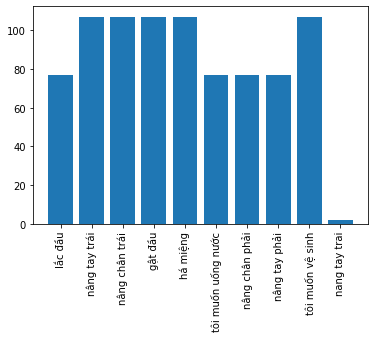

In [5]:
%%time
subjects_scenarios = load_subjects(data_dir)
print(f"found {len(subjects_scenarios)} subjects")

scenario_count = dict()
for _, scenarios in subjects_scenarios:
    for scenario in scenarios:
        if scenario in scenario_count:
            scenario_count[scenario] += 1
        else:
            scenario_count[scenario] = 1

plt.bar(scenario_count.keys(), scenario_count.values())
plt.xticks(rotation='vertical')

In [ ]:
subjects, _ = zip(*subjects_scenarios)
subjects = sorted(subjects)
for i in range(0, len(subjects), 5):
    print(subjects[i: i + 5])

['ALS01_t1', 'ALS01_t2', 'ALS02_t1', 'ALS02_t2', 'BN001']
['BN002', 'BN003', 'BN004', 'BN099', 'BN100']
['K001', 'K002', 'K003', 'K004', 'K005']
['K006', 'K007', 'K008', 'K009', 'K010']
['K011', 'K012', 'K013', 'K014', 'K015']
['K016', 'K017', 'K018', 'K019', 'K020']
['K021', 'K022', 'K023', 'K024', 'K025']
['K026', 'K027', 'K028', 'K299', 'K300']
['K301', 'K302', 'K303', 'K304', 'K305']
['K306', 'K307', 'K308', 'K309', 'K310']
['K311', 'K312', 'K313', 'K314', 'K315']
['K316', 'K317', 'K318', 'K319', 'K320']
['K321', 'K322', 'K323', 'K324', 'K325']
['K326', 'K327', 'K328', 'K329', 'K330']
['K331', 'K332', 'K333', 'K334', 'K335']
['K336', 'K337', 'K338', 'K339', 'K340']
['K342', 'K343', 'K344', 'K350', 'K351']
['K352', 'K353', 'K354', 'K355', 'K356']
['K357', 'K358', 'K359', 'K360', 'K361']
['K362', 'K363', 'K364', 'K365', 'K366']
['K367', 'K368', 'K369', 'K370', 'K371']
['K372', 'K373', 'K374', 'K375']


In [6]:
%%time
# fmt: off
# subjects = [
#     'K300', 'K309', 'K310', 'K311', 'K312', 
#     'K313', 'K314', 'K315', 'K316', 'K319', 
#     'K320', 'K321', 'K322', 'K323', 'K324', 
#     'K325', 'K326', 'K327', 'K328', 'K329', 
#     'K330', 'K331', 'K332', 'K333', 'K334', 
#     'K335', 'K336', 'K337', 'K338', 'K339', 
#     'K340', 'K342', 'K343', 'K344', 'K350', 
#     'K351', 'K352', 'K353', 'K354', 'K355', 
#     'K356', 'K357', 'K358', 'K359', 'K360', 
#     'K361', 'K362', 'K363', 'K364', 'K365', 
#     'K366', 'K367', 'K368', 'K369', 'K370', 
#     'K371', 'K372', 'K373', 'K374', 'K375',
# ]

subjects = [
    'K001', 'K002', 'K003', 'K004',
    'K005', 'K006', 'K007', 'K008', 'K009',
    'K010', 'K011', 'K012', 'K013', 'K014',
    'K015', 'K016', 'K017', 'K018', 'K019',
    'K020', 'K021', 'K022', 'K023', 'K024',
    'K025', 'K026', 'K027', 'K028', 'K299',
    'K300', 'K301', 'K302', 'K303', 'K304',
    'K305', 'K306', 'K307', 'K308', 'K309',
    'K310', 'K311', 'K312', 'K313', 'K314',
    'K315', 'K316', 'K317', 'K318', 'K319',
    'K320', 'K321', 'K322', 'K323', 'K324',
    'K325', 'K326', 'K327', 'K328', 'K329',
    'K330', 'K331', 'K332', 'K333', 'K334',
    'K335', 'K336', 'K337', 'K338', 'K339',
    'K340', 'K342', 'K343', 'K344', 'K350',
    'K351', 'K352', 'K353', 'K354', 'K355',
    'K356', 'K357', 'K358', 'K359', 'K360',
    'K361', 'K362', 'K363', 'K364', 'K365',
    'K366', 'K367', 'K368', 'K369', 'K370',
    'K371', 'K372', 'K373', 'K374', 'K375',
]

subjects = sorted(subjects)

scenarios = [
    "nâng tay trái",
    "nâng tay phải",
    "nâng chân trái",
    "nâng chân phải",
    # "gật đầu",
    # "lắc đầu",
    # "há miệng",
]

events = [
    "Thinking",
    # "Thinking and Acting",
    "Resting",
    # "Typing",
]

channels = [
    "Fp1", "Fp2",
    "F7", "F3", "Fz", "F4", "F8",
    # "FT9", "FC5", "FC1", "FC2", "FC6", "FT10",
    "FC5", "FC1", "FC2", "FC6",
    "T7", "C3", "Cz", "C4", "T8",
    "CP5", "CP1", "CP2", "CP6",
    "P7", "P3", "Pz", "P4", "P8",
    # "PO9", "O1", "Oz", "O2", "PO10",
    "O1", "Oz", "O2",
]
# channels = [
#     # "F3", "Fz", "F4",
#     "FC5", "FC1", "FC2", "FC6",
#     "C3", "Cz", "C4",
#     "CP5", "CP1", "CP2", "CP6",
#     # "P3", "Pz", "P4",
# ]

label_mapping={
    "nâng tay trái_Thinking": "nâng tay trái",
    "nâng tay phải_Thinking": "nâng tay phải",
    # "nâng tay trái_Thinking": "nâng tay",
    # "nâng tay phải_Thinking": "nâng tay",
    # "nâng tay trái_Thinking": "mi",
    # "nâng tay phải_Thinking": "mi",
    "nâng chân trái_Thinking": "nâng chân trái",
    "nâng chân phải_Thinking": "nâng chân phải",
    # "nâng chân trái_Thinking": "nâng chân",
    # "nâng chân phải_Thinking": "nâng chân",
    # "nâng chân trái_Thinking": "mi",
    # "nâng chân phải_Thinking": "mi",
    "gật đầu_Thinking": "gật đầu",
    "lắc đầu_Thinking": "lắc đầu",
    # "gật đầu_Thinking": "đầu",
    # "lắc đầu_Thinking": "đầu",
    # "gật đầu_Thinking": "mi",
    # "lắc đầu_Thinking": "mi",
    "há miệng_Thinking": "há miệng",
    # "há miệng_Thinking": "mi",
    # "nâng tay trái_Thinking and Acting": "nâng tay trái",
    # "nâng tay phải_Thinking and Acting": "nâng tay phải",
    # "nâng chân trái_Thinking and Acting": "nâng chân trái",
    # "nâng chân phải_Thinking and Acting": "nâng chân phải",
    # "gật đầu_Thinking and Acting": "gật đầu",
    # "lắc đầu_Thinking and Acting": "lắc đầu",
    # "há miệng_Thinking and Acting": "há miệng",
    "Resting": "rest",
}

n_channels = len(channels)

print(f"using {n_channels} channels")

minimal_trial_duration = 3  # @param
window_duration = 2  # @param
window_stride_duration = 0.5  # @param

fmin = 8.0  # @param
fmax = 30.0  # @param

ds = load_data(
    data_dir,  
    subjects=subjects,
    scenarios=scenarios,
    events=events,
    channels=channels,
    label_mapping=label_mapping,
    minimal_trial_duration=minimal_trial_duration,
    window_duration=window_duration, 
    window_stride_duration=window_stride_duration, 
    start_offset=0,
    stop_offset=0,
    fmin=fmin, 
    fmax=fmax, 
    moving_standardize=False,
    resample=None,
    return_raw=False,
    return_preprocessed=False,
    preload=True,
)

# als_subjects = ["ALS01_t1", "ALS01_t2", "ALS02_t1", "ALS02_t2"]

# als_ds = load_data(
#     als_data_dir,  
#     subjects=als_subjects,
#     scenarios=scenarios,
#     events=events,
#     channels=channels,
#     label_mapping=label_mapping,
#     minimal_trial_duration=minimal_trial_duration,
#     window_duration=window_duration, 
#     window_stride_duration=window_stride_duration, 
#     start_offset=0,
#     stop_offset=0,
#     fmin=fmin, 
#     fmax=fmax, 
#     moving_standardize=False,
#     resample=None,
#     return_raw=False,
#     return_preprocessed=False,
#     preload=True,
# )

# ds = BaseConcatDataset([ds, als_ds])

# fmt: on

# for _ds in ds.datasets:
#     _ds_info = _ds.description
#     if _ds_info["subject"] == "K314":
#         _ds_info["subject"] = "K314_t1"
#     elif _ds_info["subject"] == "K324":
#         _ds_info["subject"] = "K314_t2"

ds_info = ds.description

ds_info["epochs"] = 0
for i, r in ds_info.iterrows():
    ds_info.loc[i, "epochs"] = len(ds.datasets[i].windows)

print(f"loaded {len(ds_info['subject'].unique())} subjects - {ds_info['epochs'].sum()} epochs")
ds_info

using 28 channels


subject:  16%|██████████▏                                                      | 17/109 [00:00<00:02, 42.93it/s]/home/txdat/code/eeg-motor-imagery/notebooks/data_util.py:211: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_edf(f"{sample_dir}/EEG.edf", preload=False, verbose=False)
/home/txdat/code/eeg-motor-imagery/notebooks/data_util.py:211: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_edf(f"{sample_dir}/EEG.edf", preload=False, verbose=False)
subject:  24%|███████████████▌                                                 | 26/109 [00:00<00:02, 39.64it/s]/home/txdat/code/eeg-motor-imagery/notebooks/data_util.py:211: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_edf(f"{sample_dir}/EEG.edf", preload=False, verbose=False)
subject:  28%|██████████████████▍                                              | 31/10

loaded 97 subjects - 24972 epochs
CPU times: user 36.7 s, sys: 2.03 s, total: 38.7 s
Wall time: 42.1 s


,subject,scenario,event,label,trial,split,epochs
0,K001,nâng tay trái,Thinking,nâng tay trái,0,train,9
1,K001,nâng tay trái,Resting,rest,0,train,10
2,K001,nâng tay trái,Resting,rest,1,train,5
3,K001,nâng tay trái,Thinking,nâng tay trái,1,train,10
4,K001,nâng tay trái,Resting,rest,2,train,4
...,...,...,...,...,...,...,...
2749,K375,nâng chân phải,Resting,rest,2,train,4
2750,K375,nâng chân phải,Resting,rest,3,train,5
2751,K375,nâng chân phải,Thinking,nâng chân phải,2,train,11
2752,K375,nâng chân phải,Resting,rest,4,train,6


In [7]:
!mkdir -p ./data/vin

In [8]:
with open("./data/vin/5classes.pkl", mode="wb") as f:
    pkl.dump(ds, f)

<AxesSubplot:>

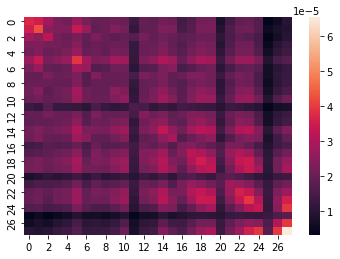

In [9]:
sb.heatmap(np.cov(ds.datasets[0].windows.get_data()[0], rowvar=True))
# sb.distplot(ds.datasets[0].windows.get_data())

In [10]:
euclidean_alignment(ds, target_subject=None, labeled_trials=None)

subject: 100%|██████████████████████████████████████████████████████████████████| 97/97 [00:02<00:00, 34.27it/s]


In [11]:
with open("./data/vin/5classes-EA.pkl", mode="wb") as f:
    pkl.dump(ds, f)

<AxesSubplot:>

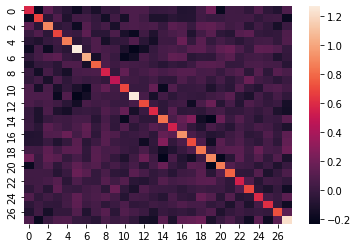

In [12]:
sb.heatmap(np.cov(ds.datasets[0].windows.get_data()[0], rowvar=True))

#### Physionet

In [15]:
!mkdir -p data/phy && rm -rf ./data/phy/*
# !cp -r ./drive/MyDrive/beetl/phy_vin_1_40.pkl ./data/phy/
# !cp -r ./drive/MyDrive/beetl/phy_vin_41_80.pkl ./data/phy/
# !cp -r ./drive/MyDrive/beetl/phy_vin_81_109.pkl ./data/phy/
!cp -r ./drive/MyDrive/beetl/phy_vin_1_40_braindcd.pkl ./data/phy/
!cp -r ./drive/MyDrive/beetl/phy_vin_41_80_braindcd.pkl ./data/phy/
!cp -r ./drive/MyDrive/beetl/phy_vin_81_109_braindcd.pkl ./data/phy/

In [ ]:
label_map = {"rest": 0, "feet": 1, "hands": 2, "left_hand": 3, "right_hand": 4}
imagined_trials = {"run_4", "run_6", "run_8", "run_10", "run_12", "run_14"}

list_of_ds = list()
for s, e in [(1, 40), (41, 80), (81, 109)]:
    with open(f"./data/phy/phy_vin_{s}_{e}.pkl", mode="rb") as f:
        X, labels, meta = pkl.load(f)["data"]
        meta["label"] = labels

        meta = meta[(meta["label"].isin(label_map)) & (meta["run"].isin(imagined_trials))]
        X = X[meta.index]
        meta = meta.reset_index(drop=True)
        meta["label_idx"] = 0
        for i, r in meta.iterrows():
            meta.loc[i, "label_idx"] = label_map[r["label"]]

        for subject in meta["subject"].unique():
            subject_meta = meta[meta["subject"] == subject]
            x = X[subject_meta.index]
            y = np.array(subject_meta["label_idx"], dtype=int)
            subject_meta = subject_meta.reset_index(drop=True)

            subject_ds = create_from_X_y(
                x,
                y,
                drop_last_window=True,
                sfreq=128.0,
                ch_names=channels,
                window_size_samples=256,
                window_stride_samples=64,
            )
            for i, ds in enumerate(subject_ds.datasets):
                r = subject_meta.iloc[i]

                setattr(
                    ds,
                    "_description",
                    pd.Series(
                        {
                            "subject": f"PHY_{subject}",
                            "scenario": r["label"],
                            "event": "Resting" if r["label"] == "rest" else "Thinking",
                            "label": r["label"],
                            "trial": int(r["run"].split("_")[1]),
                            "split": "train",
                        }
                    ),
                )

            list_of_ds.append(subject_ds)

phy_ds = BaseConcatDataset(list_of_ds)
phy_ds_info = phy_ds.description

phy_ds_info

In [26]:
list_of_ds = list()
for s, e in [(1, 40), (41, 80), (81, 109)]:
    with open(f"../data/beetl/phy_vin_{s}_{e}_braindcd.pkl", mode="rb") as f:
        ds = pkl.load(f)
        list_of_ds.extend(ds.datasets)

phy_ds = BaseConcatDataset(list_of_ds)
phy_ds_info = phy_ds.description

phy_ds_info

,subject,scenario,event,label,trial,split
0,PHY_001,rest,Resting,rest,0,train
1,PHY_001,right_hand,Thinking,right_hand,0,train
2,PHY_001,rest,Resting,rest,0,train
3,PHY_001,left_hand,Thinking,left_hand,0,train
4,PHY_001,rest,Resting,rest,0,train
...,...,...,...,...,...,...
18895,PHY_109,hands,Thinking,hands,5,train
18896,PHY_109,rest,Resting,rest,5,train
18897,PHY_109,feet,Thinking,feet,5,train
18898,PHY_109,rest,Resting,rest,5,train


In [27]:
phy_ds_info["epochs"] = 0
for i, r in phy_ds_info.iterrows():
    phy_ds_info.loc[i, "epochs"] = len(phy_ds.datasets[i].windows)
    
phy_ds_info

,subject,scenario,event,label,trial,split,epochs
0,PHY_001,rest,Resting,rest,0,train,3
1,PHY_001,right_hand,Thinking,right_hand,0,train,3
2,PHY_001,rest,Resting,rest,0,train,3
3,PHY_001,left_hand,Thinking,left_hand,0,train,3
4,PHY_001,rest,Resting,rest,0,train,3
...,...,...,...,...,...,...,...
18895,PHY_109,hands,Thinking,hands,5,train,3
18896,PHY_109,rest,Resting,rest,5,train,3
18897,PHY_109,feet,Thinking,feet,5,train,3
18898,PHY_109,rest,Resting,rest,5,train,3


In [28]:
phy_ds_info["trial"].unique()

array([0, 1, 2, 3, 4, 5])

## lightning model

In [3]:
from typing import Type, Callable, Dict, Tuple, List, Union, Optional
from itertools import combinations, product
from collections import defaultdict
from functools import partial
from copy import deepcopy
from tqdm import tqdm
import time
from datetime import timedelta
import pickle as pkl
import os
import uuid
import random
import math
import numpy as np
from scipy import linalg, stats, signal
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as td
import torch.optim as optim
# import torch_geometric.nn as gnn
# from torch_geometric.data import Data as GraphData
# from torch_geometric.loader import DataLoader as GraphDataLoader
import pytorch_lightning as pl
from pytorch_lightning.loggers import TensorBoardLogger
from pytorch_lightning.callbacks import LearningRateMonitor, ModelCheckpoint, StochasticWeightAveraging, EarlyStopping
from pytorch_metric_learning import losses
import sklearn.metrics as metrics
from sklearn.utils.class_weight import compute_class_weight
from sklearn.preprocessing import LabelEncoder
from braindecode.models import ShallowFBCSPNet, EEGNetv4
from braindecode.models.tidnet import _TIDNetFeatures
from batchinstancenorm import BatchInstanceNorm2d
from eadam import EAdam

seed = 42  # @param

pl.seed_everything(seed)

torch.backends.cudnn.benchmark = False

device = torch.device("cuda")

Global seed set to 42


In [4]:
%load_ext tensorboard
%matplotlib inline

#### data loader

In [5]:
class ImbalancedDataSampler(td.Sampler):
    def __init__(self, targets: np.ndarray):  # [len(data),]
        self.num_samples = len(targets)

        count = np.bincount(targets)
        self.weight = torch.tensor(1.0 / count[targets]).float()

    def __len__(self):
        return self.num_samples

    def __iter__(self):
        return (
            int(i)
            for i in torch.multinomial(self.weight, self.num_samples, replacement=True)
        )

In [6]:
class SubjectSampler(td.Sampler):
    def __init__(self, subjects: np.ndarray, batch_size: int = 1):  # [len(data),]
        values, counts = np.unique(subjects, return_counts=True)
        counts = counts // batch_size + 1  # num of sampling times
        self.num_samples = counts.sum() * batch_size

        self.indices = {v: np.where(subjects == v)[0] for v in values}

        self.subject_indices = list()
        for i, v in enumerate(values):
            self.subject_indices.extend([v] * counts[i])
        self.subject_indices = np.array(self.subject_indices, dtype=int)

        self.batch_size = batch_size

    def __len__(self):
        return self.num_samples

    def __iter__(self):
        np.random.shuffle(self.subject_indices)

        indices = list()
        for v in self.subject_indices:
            indices.extend(
                np.random.choice(
                    self.indices[v], self.batch_size, replace=True
                ).tolist()
            )

        return iter(indices)

In [7]:
class MultipleLoader(object):
    def __init__(self, list_of_loader: List[td.DataLoader]):
        self.list_of_loader = list_of_loader
        self.list_of_loader_iter = [iter(loader) for loader in list_of_loader]

        self.n_steps = max([len(loader) for loader in list_of_loader])

    def __len__(self):
        return self.n_steps

    def __iter__(self):
        for _ in range(self.n_steps):
            batch = list()
            for i, loader_iter in enumerate(self.list_of_loader_iter):
                try:
                    batch.append(loader_iter.next())

                except StopIteration:
                    self.list_of_loader_iter[i] = iter(self.list_of_loader[i])

                    batch.append(self.list_of_loader_iter[i].next())

            yield batch

In [8]:
class EEGDataset(td.Dataset):
    STD_SCALE = 1.0 / 1.4628

    def __init__(
        self,
        X: np.ndarray,
        Y: Optional[np.ndarray] = None,
        is_training: bool = True,
        use_augmentation: bool = True,
        use_normalization: bool = True,
        seed: int = 42,
    ):
        super().__init__()

        assert X.ndim == 3, f"invalid data shape {X.ndim} != 3"

        self.X = X  # [B,C,T]
        self.Y = Y  # [B,]

        self.is_training = is_training
        self.use_augmentation = use_augmentation
        self.use_normalization = use_normalization

        self.rng = np.random.RandomState(seed=seed)

    def __len__(self):
        return len(self.X)

    @property
    def class_weight(self) -> np.ndarray:
        return compute_class_weight("balanced", classes=np.unique(self.Y), y=self.Y)

    def augmentation(self, x):
        if self.rng.uniform() < 0.5:  # gaussian noise
            x += self.rng.normal(
                0.0, 0.2 * np.std(x, axis=-1, keepdims=True), size=x.shape
            )

        return x

    def normalization(self, x):
        mean = np.median(x, axis=-1, keepdims=True)
        std = np.expand_dims(
            stats.median_abs_deviation(x, axis=-1, scale=self.STD_SCALE),
            axis=-1,
        )
        # mean = np.mean(x, axis=-1, keepdims=True)
        # std = np.std(x, axis=-1, keepdims=True)

        x -= mean
        x /= std

        return x

    def __getitem__(self, item):
        x = self.X[item]
        y = self.Y[item] if self.Y is not None else -1

        if self.use_augmentation:
            x = self.augmentation(x)

        if self.use_normalization:
            x = self.normalization(x)

        return x, y

    @staticmethod
    def batchify(batch):
        x, y = zip(*batch)

        x = torch.tensor(np.stack(x)).float()
        y = torch.tensor(np.array(y, dtype=int)).long()

        return x, y


def get_eeg_data_loader(
    eeg_data: Union[BaseConcatDataset, Tuple[np.ndarray, Optional[np.ndarray]]],
    is_training: bool = True,
    use_augmentation: bool = True,
    use_normalization: bool = True,
    seed: int = 42,
    batch_size: int = 1,
    num_samples: Optional[int] = None,
    use_imbalanced_sampler: bool = False,
    **kwargs,
) -> Tuple[td.Dataset, td.DataLoader]:
    if isinstance(eeg_data, BaseConcatDataset):
        X = list()
        Y = list()
        for ds in eeg_data.datasets:
            X.append(ds.windows.get_data())
            Y.extend(ds.y)

        X = np.concatenate(X, axis=0)
        Y = np.array(Y, dtype=int)

    else:
        X, Y = eeg_data

    eeg_ds = EEGDataset(
        X,
        Y,
        is_training=is_training,
        use_augmentation=use_augmentation,
        use_normalization=use_normalization,
        seed=seed,
    )

    sampler = None
    if num_samples is not None:
        sampler = td.RandomSampler(eeg_ds, replacement=True, num_samples=num_samples)
    elif use_imbalanced_sampler:
        sampler = ImbalancedDataSampler(eeg_ds.Y)

    loader = td.DataLoader(
        eeg_ds,
        batch_size=batch_size,
        shuffle=is_training and sampler is None,
        sampler=sampler,
        num_workers=kwargs.pop("num_workers", os.cpu_count()),
        collate_fn=EEGDataset.batchify,
        pin_memory=True,
        **kwargs,
    )

    return eeg_ds, loader

In [9]:
# class GraphEEGDataset(td.Dataset):
#     STD_SCALE = 1.0 / 1.4628

#     def __init__(
#         self,
#         X: np.ndarray,
#         Y: Optional[np.ndarray] = None,
#         top_k: Optional[int] = None,
#         is_training: bool = True,
#         use_augmentation: bool = True,
#         use_normalization: bool = True,
#         seed: int = 42,
#     ):
#         super().__init__()

#         assert X.ndim == 3, f"invalid data shape {X.ndim} != 3"

#         self.X = X  # [B,C,T]
#         self.Y = Y  # [B,]

#         # TODO: implement topk edges
#         self.top_k = (
#             (top_k + 1) if top_k is not None else None
#         )  # ignore self-connection

#         self.n_channels = X.shape[1]

#         self.is_training = is_training
#         self.use_augmentation = use_augmentation
#         self.use_normalization = use_normalization

#         self.rng = np.random.RandomState(seed=seed)

#     def __len__(self):
#         return len(self.X)

#     @property
#     def class_weight(self) -> np.ndarray:
#         return compute_class_weight("balanced", classes=np.unique(self.Y), y=self.Y)

#     def augmentation(self, x):
#         if self.rng.uniform() < 0.5:  # gaussian noise
#             x += self.rng.normal(
#                 0.0, 0.2 * np.std(x, axis=-1, keepdims=True), size=x.shape
#             )

#         return x

#     def normalization(self, x):
#         mean = np.median(x, axis=-1, keepdims=True)
#         std = np.expand_dims(
#             stats.median_abs_deviation(x, axis=-1, scale=self.STD_SCALE),
#             axis=-1,
#         )
#         # mean = np.mean(x, axis=-1, keepdims=True)
#         # std = np.std(x, axis=-1, keepdims=True)

#         x -= mean
#         x /= std

#         return x

#     def compute_edge_weight(self, x):  # w >= 0
#         # pearson correlation coefficients
#         x = x - x.mean(axis=-1, keepdims=True)
#         x = (x @ np.swapaxes(x, -1, -2)) / (x.shape[-1] - 1)  # [B,C,C]

#         diag = np.expand_dims(np.diagonal(x, axis1=-1, axis2=-2), axis=-1)  # [B,C,1]
#         x /= np.sqrt(diag @ np.swapaxes(diag, -1, -2))  # [B,C,C] \in [-1, 1]
#         x /= 2.0
#         x += 0.5

#         return x

#     def __getitem__(self, item):
#         x = self.X[item]
#         y = self.Y[item] if self.Y is not None else -1

#         if self.use_augmentation:
#             x = self.augmentation(x)

#         # if self.use_normalization:
#         x = self.normalization(x)

#         edge_weight = self.compute_edge_weight(x)  # [C,C]
#         if self.top_k is not None:
#             indices = edge_weight.argsort(axis=1)[:, -self.top_k :]
#             edge_index = set()
#             for i, j in product(range(self.n_channels), range(self.top_k)):
#                 if (i, indices[i, j]) in edge_index:
#                     continue
#                 edge_index.add((i, indices[i, j]))
#                 if indices[i, j] != i:
#                     edge_index.add((indices[i, j], i))
#             edge_index = np.array(list(edge_index), dtype=int).T
#             edge_weight = edge_weight[edge_index[0], edge_index[1]]  # [nE]

#         else:
#             # without self-connection
#             # edge_index = np.array(
#             #     list(combinations(range(self.n_channels), r=2)), dtype=int
#             # )
#             # edge_index = np.hstack((edge_index, edge_index[:, ::-1])).T  # [2,nE]
#             # with self-connection
#             edge_index = np.array(
#                 list(product(range(self.n_channels), range(self.n_channels))), dtype=int
#             ).T  # [2,nE]
#             edge_weight = edge_weight[edge_index[0], edge_index[1]]  # [nE,]

#         return GraphData(
#             x=torch.tensor(x).float(),
#             edge_index=torch.tensor(edge_index).long(),
#             y=torch.tensor([y]).long(),
#             edge_weight=torch.tensor(edge_weight).float(),
#         )


# def get_graph_eeg_data_loader(
#     eeg_data: Union[BaseConcatDataset, Tuple[np.ndarray, Optional[np.ndarray]]],
#     top_k: Optional[int] = None,
#     is_training: bool = True,
#     use_augmentation: bool = True,
#     use_normalization: bool = True,
#     seed: int = 42,
#     batch_size: int = 1,
#     num_samples: Optional[int] = None,
#     use_imbalanced_sampler: bool = False,
#     **kwargs,
# ) -> Tuple[td.Dataset, td.DataLoader]:
#     if isinstance(eeg_data, BaseConcatDataset):
#         X = list()
#         Y = list()
#         for ds in eeg_data.datasets:
#             X.append(ds.windows.get_data())
#             Y.extend(ds.y)

#         X = np.concatenate(X, axis=0)
#         Y = np.array(Y, dtype=int)

#     else:
#         X, Y = eeg_data

#     eeg_ds = GraphEEGDataset(
#         X,
#         Y,
#         top_k=top_k,
#         is_training=is_training,
#         use_augmentation=use_augmentation,
#         use_normalization=use_normalization,
#         seed=seed,
#     )

#     sampler = None
#     if num_samples is not None:
#         sampler = td.RandomSampler(eeg_ds, replacement=True, num_samples=num_samples)
#     elif use_imbalanced_sampler:
#         sampler = ImbalancedDataSampler(eeg_ds.Y)

#     loader = GraphDataLoader(
#         eeg_ds,
#         batch_size=batch_size,
#         shuffle=is_training and sampler is None,
#         sampler=sampler,
#         num_workers=kwargs.pop("num_workers", os.cpu_count()),
#         pin_memory=True,
#         **kwargs,
#     )

#     return eeg_ds, loader

#### losses

In [10]:
def nll_loss(
    input: torch.Tensor,
    target: torch.Tensor,
    weight: Optional[torch.Tensor] = None,
    smooth: float = 0,
    reduce: bool = True,
) -> torch.Tensor:
    # input (log_prob): [bsz, num_classes], target (classes): [bsz]
    n_classes = input.size(1)
    target0 = F.one_hot(target, num_classes=n_classes).float()
    target = (1.0 - smooth) * target0 + smooth / n_classes

    if weight is not None:
        if reduce:
            return -(target * weight * input).sum() / (target0 * weight).sum()

        return -(target * weight * input).sum(dim=1)

    else:
        if reduce:
            return -(target * input).sum(dim=1).mean()

        return -(target * input).sum(dim=1)


def focal_loss(
    input: torch.Tensor,
    target: torch.Tensor,
    weight: Optional[torch.Tensor] = None,
    smooth: float = 0,
    gamma: float = 2.0,
    reduce: bool = True,
) -> torch.Tensor:
    # https://discuss.pytorch.org/t/is-this-a-correct-implementation-for-focal-loss-in-pytorch/43327/8
    # not working well with smooth

    # input (log_prob): [bsz, num_classes], target (classes): [bsz]
    sm_gamma = F.one_hot(target, num_classes=n_classes).float() * gamma
    weighted_input = torch.pow(1.0 - torch.exp(input), sm_gamma) * input

    return nll_loss(weighted_input, target, weight=weight, smooth=smooth, reduce=reduce)


class NllLoss(nn.Module):
    def __init__(
        self,
        weight: Optional[torch.Tensor] = None,
        smooth: float = 0,
        reduce: bool = True,
    ):
        super().__init__()

        self.register_buffer(
            "weight", weight.unsqueeze(0) if weight is not None else None
        )  # [1, n_classes]
        self.weight: Optional[torch.Tensor]

        self.smooth = smooth
        self.reduce = reduce

    def forward(self, input: torch.Tensor, target: torch.Tensor) -> torch.Tensor:
        return nll_loss(
            input,
            target,
            weight=self.weight,
            smooth=self.smooth,
            reduce=self.reduce,
        )


class FocalLoss(NllLoss):
    """
    class-weighted focal loss
    """

    def __init__(
        self,
        weight: Optional[torch.Tensor] = None,
        smooth: float = 0,
        gamma: float = 2.0,
        reduce: bool = True,
    ):
        super().__init__(weight, smooth, reduce)

        self.gamma = gamma

    def forward(self, input: torch.Tensor, target: torch.Tensor) -> torch.Tensor:
        return focal_loss(
            input,
            target,
            weight=self.weight,
            smooth=self.smooth,
            gamma=self.gamma,
            reduce=self.reduce,
        )

#### models

In [11]:
class DynamicSpatialBlock(nn.Module):
    """
    Dynamic spatial filtering (n_in_channels -> n_out_channels)
    https://arxiv.org/abs/2105.12916

    # TODO: check working with normalized EEG?
    """

    def __init__(self, n_in_channels, n_out_channels, logcov=True, soft_thresh=0.1, drop_prob=0.25):
        super().__init__()

        inp = (n_in_channels * (n_in_channels + 1) // 2) if logcov else n_in_channels
        out = n_out_channels * n_in_channels + n_out_channels
        hid = out // 4

        self.linear = nn.Sequential(
            nn.Linear(inp, hid, bias=True),
            nn.ReLU(inplace=True),
            # nn.Dropout(p=drop_prob),
            nn.Linear(hid, out, bias=True),
            # LinearWithConstraint(hid, out, max_norm=1.0, bias=True),
        )

        self.inds = torch.triu_indices(
            n_in_channels, n_in_channels
        )  # upper, [2,n_in*(n_in+1)/2]

        self.n_in_channels = n_in_channels
        self.n_out_channels = n_out_channels
        self.logcov = logcov
        self.soft_thresh = soft_thresh

    def forward(self, x):  # x: [B,C,T]
        # x is not NORMALIZED

        if self.logcov:
            # compute log-covariance
            # log(C) = Ulog(V)U.T
            xm = x - x.mean(dim=2, keepdim=True)
            cov = torch.matmul(xm, xm.transpose(2, 1)) / (xm.size(2) - 1)

            e, v = torch.linalg.eigh(cov, UPLO="U")
            e = torch.log(torch.clamp(e, min=1e-10))
            log_cov = torch.matmul(
                torch.matmul(v, e.diag_embed()), v.transpose(2, 1)
            )  # [B,C,C]

            feats = log_cov[:, self.inds[0], self.inds[1]]  # [B,n_in*(n_in+1)/2]

        else:
            # compute log-variance
            feats = torch.log(torch.var(x, dim=2, unbiased=True))
            feats[torch.isneginf(feats)] = 0

        feats = self.linear(feats)  # [B,n_out*n_in+n_out]

        w = feats[:, : -self.n_out_channels].reshape(
            -1, self.n_out_channels, self.n_in_channels
        )  # [B,n_out,n_in]
        b = feats[:, -self.n_out_channels :].reshape(
            -1, self.n_out_channels, 1
        )  # [B,n_out,1]

        if self.logcov and self.soft_thresh > 0:
            # apply soft-thresholding in [-thr,thr]
            w = torch.clamp(w - self.soft_thresh, min=0) + torch.clamp(
                w + self.soft_thresh, max=0
            )

        x = (x - x.mean(dim=2, keepdim=True)) / x.std(dim=2, keepdim=True)
        x = torch.matmul(w, x) + b

        return x

In [12]:
class Conv2dWithConstraint(nn.Conv2d):
    def __init__(self, *args, max_norm: float = 1.0, **kwargs):
        self.max_norm = max_norm
        super(Conv2dWithConstraint, self).__init__(*args, **kwargs)

    def forward(self, x):
        self.weight.data = torch.renorm(
            self.weight.data, p=2, dim=0, maxnorm=self.max_norm
        )
        return super(Conv2dWithConstraint, self).forward(x)
    
    
class LinearWithConstraint(nn.Linear):
    def __init__(self, *args, max_norm: float = 1.0, **kwargs):
        self.max_norm = max_norm
        super(LinearWithConstraint, self).__init__(*args, **kwargs)

    def forward(self, x):
        self.weight.data = torch.renorm(
            self.weight.data, p=2, dim=0, maxnorm=self.max_norm
        )
        return super(LinearWithConstraint, self).forward(x)


class ConvTS(nn.Sequential):
    def __init__(
        self,
        in_chans,
        in_depth,
        F1=8,
        D=2,
        kernel_length=64,
        pool_mode="mean",
        drop_prob=0.25,
    ):
        super().__init__()

        pool_class = dict(max=nn.MaxPool2d, mean=nn.AvgPool2d)[pool_mode]

        self.add_module(
            "conv_temporal",
            nn.Conv2d(
                in_depth,
                F1,
                kernel_size=(1, kernel_length),
                stride=(1, 1),
                bias=False,
                padding=(0, kernel_length // 2),
            ),
        )
        self.add_module(
            "bnorm_temporal",
            nn.BatchNorm2d(F1, momentum=0.01, affine=True, eps=1e-3),
            # nn.InstanceNorm2d(F1, momentum=0.01, affine=True, eps=1e-3),
            # BatchInstanceNorm2d(F1, momentum=0.01, affine=True, eps=1e-3),
        )
        self.add_module(
            "conv_spatial",
            Conv2dWithConstraint(
                F1,
                F1 * D,
                max_norm=1.0,
                kernel_size=(in_chans, 1),
                stride=(1, 1),
                bias=False,
                groups=F1,
                padding=(0, 0),
            ),
        )
        self.add_module(
            "bnorm_1",
            nn.BatchNorm2d(F1 * D, momentum=0.01, affine=True, eps=1e-3),
            # nn.InstanceNorm2d(F1 * D, momentum=0.01, affine=True, eps=1e-3),
            # BatchInstanceNorm2d(F1 * D, momentum=0.01, affine=True, eps=1e-3),
        )
        self.add_module("elu_1", nn.ELU(inplace=True))
        self.add_module("pool_1", pool_class(kernel_size=(1, 4), stride=(1, 4)))
        self.add_module("drop_1", nn.Dropout(p=drop_prob))


class MB_EEGNet(nn.Module):
    def __init__(
        self,
        n_classes,
        in_chans,
        in_samples,
        in_depth=1,
        final_conv_length="auto",
        pool_mode="mean",
        F1=8,
        D=2,
        F2=16,
        F3=16,
        kernel_lengths=(32,),
        third_kernel_size=(8, 4),
        drop_prob=0.5,
    ):
        super().__init__()

        pool_class = dict(max=nn.MaxPool2d, mean=nn.AvgPool2d)[pool_mode]

        self.conv_1s = nn.ModuleList()
        for kernel_length in kernel_lengths:
            self.conv_1s.append(
                ConvTS(
                    in_chans,
                    in_depth,
                    F1,
                    D,
                    kernel_length,
                    pool_mode,
                    drop_prob,
                )
            )

        self.conv_2 = nn.Sequential()
        self.conv_2.add_module(
            "conv_separable_depth",
            nn.Conv2d(
                F1 * D,
                F1 * D,
                kernel_size=(1, 16),
                stride=(1, 1),
                bias=False,
                groups=F1 * D,
                padding=(0, 8),
            ),
        )
        self.conv_2.add_module(
            "conv_separable_point",
            nn.Conv2d(
                F1 * D,
                F2,
                kernel_size=(1, 1),
                stride=(1, 1),
                bias=False,
                padding=(0, 0),
            ),
        )
        self.conv_2.add_module(
            "bnorm_2",
            nn.BatchNorm2d(F2, momentum=0.01, affine=True, eps=1e-3),
            # nn.InstanceNorm2d(F2, momentum=0.01, affine=True, eps=1e-3),
            # BatchInstanceNorm2d(F2, momentum=0.01, affine=True, eps=1e-3),
        )
        self.conv_2.add_module("elu_2", nn.ELU(inplace=True))
        self.conv_2.add_module("pool_2", pool_class(kernel_size=(1, 8), stride=(1, 8)))
        # self.conv_2.add_module("drop_2", nn.Dropout(p=drop_prob))

        # with torch.no_grad():
        #     x = torch.zeros((1, in_depth, in_chans, in_samples), dtype=torch.float32)
        #     x = torch.stack([conv(x) for conv in self.conv_1s]).sum(dim=0)
        #     x = self.conv_2(x)
        #     x = x.cpu().data.numpy()
        #
        # self.conv_3 = nn.Sequential()
        # self.conv_3.add_module(
        #     "conv_separable_depth",
        #     nn.Conv2d(
        #         F2,
        #         F2,
        #         kernel_size=(x.shape[2], x.shape[3]),
        #         stride=(1, 1),
        #         bias=False,
        #         groups=F2,
        #         padding=(0, 0),
        #     ),
        # )
        # self.conv_3.add_module(
        #     "conv_separable_point",
        #     nn.Conv2d(
        #         F2,
        #         F3,
        #         kernel_size=(1, 1),
        #         stride=(1, 1),
        #         bias=False,
        #         padding=(0, 0),
        #     ),
        # )
        # self.conv_3.add_module(
        #     "bnorm_3",
        #     nn.BatchNorm2d(F3, momentum=0.01, affine=True, eps=1e-3),
        # )
        # self.conv_3.add_module("elu_3", nn.ELU(inplace=True))

        # Classifier
        # self.drop = nn.Dropout(p=drop_prob)
        # self.clf = nn.Linear(F3, n_classes, bias=True)

    def forward(self, x: torch.Tensor):
        if x.ndim == 3:
            x = x.unsqueeze(1)  # [B1CT]

        # x = self.pre_norm(x).unsqueeze(1)  # [B1CT]

        x = torch.stack([conv(x) for conv in self.conv_1s]).sum(dim=0)
        x = self.conv_2(x)
        # x = self.conv_3(x)

        x = torch.flatten(x, start_dim=1)  # [B,F3]
        # x = self.drop(x)
        # x = self.clf(x)

        return x


class EEGClassifier(nn.Module):
    def __init__(self, F3, n_classes, drop_prob=0.5):
        super().__init__()

        self.drop = nn.Dropout(p=drop_prob)
        self.ln = nn.Linear(F3, n_classes, bias=True)
        # self.ln = LinearWithConstraint(F3, n_classes, max_norm=0.5, bias=True)

    def forward(self, x):
        x = self.drop(x)
        x = self.ln(x)

        return x

In [13]:
# class ConvT(nn.Sequential):
#     def __init__(
#         self,
#         in_chans,
#         F1=8,
#         kernel_length=32,
#         pool_mode="mean",
#         drop_prob=0.5,
#     ):
#         super().__init__()

#         pool_class = dict(max=nn.MaxPool2d, mean=nn.AvgPool2d)[pool_mode]

#         self.add_module(
#             "conv_dw",
#             nn.Conv2d(
#                 in_chans,
#                 in_chans,
#                 kernel_size=(1, kernel_length),
#                 stride=(1, 1),
#                 padding=(0, kernel_length // 2),
#                 groups=in_chans,
#                 bias=False,
#             ),
#         )
#         self.add_module(
#             "conv_pw",
#             nn.Conv2d(
#                 in_chans,
#                 in_chans * F1,
#                 kernel_size=(1, 1),
#                 stride=(1, 1),
#                 padding=(0, 0),
#                 groups=in_chans,
#                 bias=False,
#             ),
#         )
#         self.add_module("bnorm", nn.BatchNorm2d(in_chans * F1))
#         self.add_module("elu", nn.ELU(inplace=True))
#         self.add_module("pool", pool_class(kernel_size=(1, 4), stride=(1, 4)))
#         self.add_module("drop", nn.Dropout(p=drop_prob))


# class MB_EEGNet_GNN(nn.Module):
#     def __init__(
#         self,
#         n_classes,
#         in_chans,
#         in_samples,
#         in_depth=1,
#         final_conv_length="auto",
#         pool_mode="mean",
#         F1=8,
#         D=2,
#         F2=16,
#         F3=16,
#         kernel_lengths=(32,),
#         third_kernel_size=(8, 4),
#         drop_prob=0.5,
#     ):
#         super().__init__()

#         pool_class = dict(max=nn.MaxPool2d, mean=nn.AvgPool2d)[pool_mode]

#         # CNN
#         self.conv_1s = nn.ModuleList()
#         for kernel_length in kernel_lengths:
#             self.conv_1s.append(
#                 ConvT(
#                     in_chans,
#                     F1,
#                     kernel_length,
#                     pool_mode,
#                     drop_prob,
#                 )
#             )

#         self.conv_2 = nn.Sequential()
#         self.conv_2.add_module(
#             "conv_dw",
#             nn.Conv2d(
#                 in_chans * F1,
#                 in_chans * F1,
#                 kernel_size=(1, 16),
#                 stride=(1, 1),
#                 padding=(0, 8),
#                 groups=in_chans * F1,
#                 bias=False,
#             ),
#         )
#         self.conv_2.add_module(
#             "conv_pw",
#             nn.Conv2d(
#                 in_chans * F1,
#                 in_chans * F2,
#                 kernel_size=(1, 1),
#                 stride=(1, 1),
#                 padding=(0, 0),
#                 groups=in_chans,
#                 bias=False,
#             ),
#         )
#         self.conv_2.add_module("bnorm", nn.BatchNorm2d(in_chans * F2))
#         self.conv_2.add_module("elu", nn.ELU(inplace=True))
#         self.conv_2.add_module("pool", pool_class(kernel_size=(1, 8), stride=(1, 8)))
#         self.conv_2.add_module("drop", nn.Dropout(p=drop_prob))

#         with torch.no_grad():
#             x = torch.zeros((1, in_chans, 1, in_samples), dtype=torch.float32)
#             x = torch.stack([conv(x) for conv in self.conv_1s]).sum(dim=0)
#             x = self.conv_2(x)
#             x = x.cpu().data.numpy()

#         self.conv_3 = nn.Sequential()
#         self.conv_3.add_module(
#             "conv_dw",
#             nn.Conv2d(
#                 in_chans * F2,
#                 in_chans * F2,
#                 kernel_size=(1, x.shape[3]),
#                 stride=(1, 1),
#                 padding=(0, 0),
#                 groups=in_chans * F2,
#                 bias=False,
#             ),
#         )
#         self.conv_3.add_module(
#             "conv_pw",
#             nn.Conv2d(
#                 in_chans * F2,
#                 in_chans * F3,
#                 kernel_size=(1, 1),
#                 stride=(1, 1),
#                 padding=(0, 0),
#                 groups=in_chans,
#                 bias=False,
#             ),
#         )
#         self.conv_3.add_module("bnorm", nn.BatchNorm2d(in_chans * F3))
#         self.conv_3.add_module("elu", nn.ELU(inplace=True))

#         # Classifier
#         # self.clf = nn.Linear(F3, n_classes, bias=True)

#         self.in_chans = in_chans
#         self.in_samples = in_samples
#         self.F3 = F3

#     def forward(self, x):
#         """
#         x: [B*C,T]
#         """
#         x = x.reshape(-1, self.in_chans, 1, self.in_samples).contiguous()
#         x = torch.stack(([conv(x) for conv in self.conv_1s])).sum(dim=0)
#         x = self.conv_2(x)
#         x = self.conv_3(x)  # [B,C*F3,1,1]
#         x = x.reshape(-1, self.in_chans, self.F3).reshape(-1, self.F3).contiguous()

#         # Classifier
#         # x = self.clf(x)

#         return x


# class GraphEEGClassifier(nn.Module):
#     def __init__(self, F3, n_classes, drop_prob=0.5):
#         super().__init__()

#         # GCN
#         self.gconv_1 = gnn.Sequential(
#             "x, edge_index, edge_weight",
#             [
#                 (nn.Dropout(p=drop_prob), "x -> x"),
#                 (
#                     gnn.GCNConv(
#                         F3, F3, add_self_loops=False, normalize=True, bias=False
#                     ),
#                     "x, edge_index, edge_weight -> x",
#                     # gnn.GATv2Conv(
#                     #     F3,
#                     #     F3,
#                     #     heads=1,
#                     #     dropout=0.0,
#                     #     add_self_loops=False,
#                     #     bias=False,
#                     # ),
#                     # "x, edge_index -> x",
#                 ),
#                 nn.BatchNorm1d(F3),
#                 nn.ELU(inplace=True),
#             ],
#         )

#         self.gconv_2 = gnn.Sequential(
#             "x, edge_index, edge_weight",
#             [
#                 (nn.Dropout(p=drop_prob), "x -> x"),
#                 (
#                     gnn.GCNConv(
#                         F3, F3, add_self_loops=False, normalize=True, bias=False
#                     ),
#                     "x, edge_index, edge_weight -> x",
#                     # gnn.GATv2Conv(
#                     #     F3,
#                     #     F3,
#                     #     heads=1,
#                     #     dropout=0.0,
#                     #     add_self_loops=False,
#                     #     bias=False,
#                     # ),
#                     # "x, edge_index -> x",
#                 ),
#                 nn.BatchNorm1d(F3),
#                 nn.ELU(inplace=True),
#             ],
#         )

#         # Classifier
#         self.drop = nn.Dropout(p=drop_prob)

#         self.ln = nn.Linear(F3, n_classes, bias=True)

#     def forward(self, x, edge_index, edge_weight, batch):
#         # GCN
#         x = self.gconv_1(x, edge_index, edge_weight)
#         x = self.gconv_2(x, edge_index, edge_weight)
#         x = gnn.global_mean_pool(x, batch)  # [B,F3]

#         # Classifier
#         x = self.drop(x)
#         x = self.ln(x)

#         return x

#### lightning model

In [14]:
def init_weights(module: nn.Module, xavier_init: bool = True, gain: float = 1.0, nonlinearity: str = "leaky_relu"):
    for m in module.modules():
        if isinstance(m, (nn.Conv2d, nn.Conv1d, nn.Linear)):
            if xavier_init:
                nn.init.xavier_uniform_(m.weight, gain=gain)
            else:
                nn.init.kaiming_uniform_(m.weight, nonlinearity=nonlinearity)

            if m.bias is not None:
                nn.init.constant_(m.bias, val=0.0)
        
        elif isinstance(m, (nn.BatchNorm2d, nn.BatchNorm1d)):
            nn.init.constant_(m.weight, val=1.0)
            nn.init.constant_(m.bias, val=0.0)


def adaptive_batchnorm(module: nn.Module):
    # https://www.kaggle.com/c/recursion-cellular-image-classification/discussion/110362
    for m in module.modules():
        if isinstance(m, (nn.BatchNorm2d, nn.BatchNorm1d)):
            m.track_running_stats = False


def confusion_matrix_figure(y_true, y_pred) -> Figure:
        cfm = metrics.confusion_matrix(y_true, y_pred, normalize="true")
        cfm = np.round(cfm, 4)

        fig = plt.figure()
        plt.imshow(cfm, cmap=plt.cm.Blues)
        for i in range(cfm.shape[0]):
            for j in range(cfm.shape[1]):
                plt.text(i, j, cfm[j, i], va="center", ha="center")

        return fig


def compute_scores(y_true, y_pred) -> Dict[str, float]:
    scores = {
        "acc": metrics.balanced_accuracy_score(y_true, y_pred),
        # "pre": metrics.precision_score(y_true, y_pred, average="weighted"),
        # "rec": metrics.recall_score(y_true, y_pred, average="weighted"),
        "f1": metrics.f1_score(y_true, y_pred, average="weighted"),
        "kappa": metrics.cohen_kappa_score(y_true, y_pred),
    }

    return scores

In [15]:
class MotorImageryModule(pl.LightningModule):
    def __init__(self, n_classes, n_channels, n_samples, **kwargs):
        super().__init__()

        self.save_hyperparameters()

        self.n_channels = n_channels
        self.n_samples = n_samples

        #####################################
        ##              CNN                ##
        #####################################

        self.base_model = MB_EEGNet(
            n_classes=n_classes,
            in_chans=n_channels,
            in_samples=n_samples,
            in_depth=1,
            final_conv_length="auto",
            pool_mode="mean",
            F1=8,
            D=4,
            F2=32,
            F3=32,
            kernel_lengths=(64,),
            third_kernel_size=(8, 4),
            drop_prob=self.hparams.get("drop_prob", 0.0),
        )
        # self.base_model = _TIDNetFeatures(
        #     s_growth=8,
        #     t_filters=8,
        #     in_chans=n_channels,
        #     input_window_samples=n_samples,
        #     drop_prob=self.hparams.get("drop_prob", 0.0),
        #     pooling=32,
        #     temp_layers=2,
        #     spat_layers=2,
        #     temp_span=0.125,
        #     bottleneck=2,
        #     summary=-1,
        # )
        self.clf = EEGClassifier(256, n_classes, drop_prob=self.hparams.get("drop_prob", 0.0))
        
        #####################################
        ##              GNN                ##
        #####################################

        # self.base_model = MB_EEGNet_GNN(
        #     n_classes=n_classes,
        #     in_chans=n_channels,
        #     in_samples=n_samples,
        #     in_depth=1,
        #     final_conv_length="auto",
        #     pool_mode="mean",
        #     F1=8,
        #     D=2,
        #     F2=16,
        #     F3=16,
        #     kernel_lengths=(32,),
        #     third_kernel_size=(8, 4),
        #     drop_prob=self.hparams.get("drop_prob", 0.0),
        # )
        # self.clf = GraphEEGClassifier(16, n_classes, drop_prob=self.hparams.get("drop_prob", 0.0))

        init_weights(self.base_model, xavier_init=True, gain=1.0)  # elu's alpha=1.0
        init_weights(self.clf, xavier_init=True, gain=1.0)

        # loss' params
        self.class_weight = self.hparams.get("class_weight", None)
        self.smooth_label = self.hparams.get("smooth_label", 0.0)

        # mixup
        self.mixup_alpha = self.hparams.get("mixup_alpha", 0.0)
        self.rng = np.random.RandomState(seed=self.hparams.get("rng_seed", 42))

        # manual optimization
        # https://pytorch-lightning.readthedocs.io/en/stable/common/optimizers.html
        # self.automatic_optimization = False

    def configure_optimizers(self):
        optimizer = optim.AdamW(
            self.parameters(),
            lr=self.hparams.get("lr", 1e-3),
            weight_decay=self.hparams.get("weight_decay", 0.0),
            amsgrad=False,
        )

        if self.hparams.get("use_lr_sch", False):
            optimizer_dict = {
                "optimizer": optimizer,
                "lr_scheduler": {
                    # "scheduler": optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=self.hparams.get("epochs", 1)),
                    "scheduler": optim.lr_scheduler.MultiStepLR(optimizer, milestones=[self.hparams.get("after_n_epochs", 100)], gamma=0.1),
                    "name": "optim/lr",
                },
            }

        else:
            optimizer_dict = {
                "optimizer": optimizer,
            }

        return optimizer_dict

    def compute_loss(self, x, y, class_weight=None, reduce=True):
        x = F.log_softmax(x, dim=1)

        return nll_loss(x, y, weight=class_weight, smooth=self.smooth_label, reduce=reduce)
        # return focal_loss(x, y, weight=class_weight, smooth=self.smooth_label, reduce=reduce)

    def forward(self, x):
        #####################################
        ##              CNN                ##
        #####################################

        x = self.base_model(x)
        x = self.clf(x)

        return x

        #####################################
        ##              GNN                ##
        #####################################

        # x0 = self.base_model(x[0])
        # x0 = self.clf(x0, *x[1:])

        # return x0

    def predict(self, x):
        return torch.argmax(F.log_softmax(self(x), dim=1), dim=1)

    def epoch_end(self, outputs, mode="train"):
        y_true = torch.cat([output["y_true"] for output in outputs], dim=0).detach().cpu().numpy()
        y_pred = torch.cat([output["y_pred"] for output in outputs], dim=0).detach().cpu().numpy()

        # plot confusion matrix
        fig = self.logger.experiment.add_figure(f"{mode}/confusion_matrix", confusion_matrix_figure(y_true=y_true, y_pred=y_pred))

        # plot metrics
        scores = compute_scores(y_true=y_true, y_pred=y_pred)
        if mode != "train":
            scores["loss"] = float(torch.stack([output["loss"] for output in outputs]).mean())

        for k, v in scores.items():
            self.log(f"{mode}/{k}", v)

    def shared_step(self, x, y, class_weight=None, mixup_alpha=0.0):
        if mixup_alpha > 0:
            #####################################
            ##              CNN                ##
            #####################################
            
            lam = torch.tensor(self.rng.beta(mixup_alpha, mixup_alpha, x.size(0))).float().to(self.device)
            lam = lam.reshape(-1, 1, 1)
            _1_lam = 1.0 - lam

            perm = torch.tensor(self.rng.permutation(x.size(0))).long()
            y_perm = y[perm]

            x = lam * x + _1_lam * x[perm]

            x = self(x)

            loss = lam * self.compute_loss(x, y, class_weight, reduce=False) + _1_lam * self.compute_loss(x, y_perm, class_weight, reduce=False)
            loss = loss.mean()

            #####################################
            ##              GNN                ##
            #####################################

            # x0 = x[0]
            # x0 = x0.reshape(-1, self.n_channels, self.n_samples)  # [B,C,T]

            # lam = torch.tensor(self.rng.beta(mixup_alpha, mixup_alpha, x0.size(0))).float().to(self.device)
            # lam = lam.reshape(-1, 1, 1)
            # _1_lam = 1.0 - lam

            # perm = torch.tensor(self.rng.permutation(x0.size(0))).long()
            # y_perm = y[perm]

            # x0 = lam * x0 + _1_lam * x0[perm]
            # x0 = x0.reshape(-1, self.n_samples)

            # x0 = self((x0, *x[1:]))

            # loss = lam * self.compute_loss(x0, y, class_weight, reduce=False) + _1_lam * self.compute_loss(x0, y_perm, class_weight, reduce=False)
            # loss = loss.mean()

        else:
            x = self(x)

            loss = self.compute_loss(x, y, class_weight)

        return loss

    def training_step(self, batch, batch_idx, **kwargs):
        #####################################
        ##              CNN                ##
        #####################################

        x, y = batch  # X*: [B,C,T], Y*: [B,]

        x = x.to(self.device)
        y = y.to(self.device)

        #####################################
        ##              GNN                ##
        #####################################
        
        # x = (batch.x.to(self.device), batch.edge_index.to(self.device), batch.edge_weight.to(self.device), batch.batch.to(self.device))
        # y = batch.y.to(self.device)

        y_pred = self.predict(x)

        loss = self.shared_step(x, y, self.class_weight, self.mixup_alpha)
        self.log("train/loss", loss)

        return {
            "loss": loss,
            "y_true": y,
            "y_pred": y_pred,
        }

    def training_epoch_end(self, outputs):
        self.epoch_end(outputs, mode="train")

    def validation_step(self, batch, batch_idx, **kwargs):
        #####################################
        ##              CNN                ##
        #####################################

        x, y = batch  # X*: [B,C,T], Y*: [B,]

        x = x.to(self.device)
        y = y.to(self.device)

        #####################################
        ##              GNN                ##
        #####################################

        # x = (batch.x.to(self.device), batch.edge_index.to(self.device), batch.edge_weight.to(self.device), batch.batch.to(self.device))
        # y = batch.y.to(self.device)

        y_pred = self.predict(x)

        loss = self.shared_step(x, y, self.class_weight)

        return {
            "loss": loss,
            "y_true": y,
            "y_pred": y_pred,
        }

    def validation_epoch_end(self, outputs):
        self.epoch_end(outputs, mode="valid")

    def test_step(self, batch, batch_idx, **kwargs):
        return self.validation_step(batch, batch_idx, **kwargs)

    def test_epoch_end(self, outputs):
        self.epoch_end(outputs, mode="test")

In [16]:
class MultiDatasetsMotorImageryModule(pl.LightningModule):  # support 2 datasets only?
    def __init__(self, n_classes, n_channels, n_samples, n_src_classes, **kwargs):
        super().__init__()

        self.save_hyperparameters()

        self.n_channels = n_channels
        self.n_samples = n_samples

        #####################################
        ##              CNN                ##
        #####################################

        self.base_model = MB_EEGNet(
            n_classes=n_classes,
            in_chans=n_channels,
            in_samples=n_samples,
            in_depth=1,
            final_conv_length="auto",
            pool_mode="mean",
            F1=8,
            D=4,
            F2=32,
            F3=32,
            kernel_lengths=(64,),
            third_kernel_size=(8, 4),
            drop_prob=self.hparams.get("drop_prob", 0.0),
        )
        self.clf = EEGClassifier(256, n_classes, drop_prob=self.hparams.get("drop_prob", 0.0))
        self.src_clf = EEGClassifier(256, n_src_classes, drop_prob=self.hparams.get("drop_prob", 0.0))
        
        #####################################
        ##              GNN                ##
        #####################################

        # self.base_model = MB_EEGNet_GNN(
        #     n_classes=n_classes,
        #     in_chans=n_channels,
        #     in_samples=n_samples,
        #     in_depth=1,
        #     final_conv_length="auto",
        #     pool_mode="mean",
        #     F1=8,
        #     D=2,
        #     F2=16,
        #     F3=16,
        #     kernel_lengths=(32,),
        #     third_kernel_size=(8, 4),
        #     drop_prob=self.hparams.get("drop_prob", 0.0),
        # )
        # self.clf = GraphEEGClassifier(16, n_classes, drop_prob=self.hparams.get("drop_prob", 0.0))

        init_weights(self.base_model, xavier_init=True, gain=1.0)  # elu's alpha=1.0
        init_weights(self.clf, xavier_init=True, gain=1.0)
        init_weights(self.src_clf, xavier_init=True, gain=1.0)

        # loss' params
        self.src_class_weight = self.hparams.get("src_class_weight", None)
        self.tgt_class_weight = self.hparams.get("tgt_class_weight", None)
        self.smooth_label = self.hparams.get("smooth_label", 0.0)

        self.src_loss_scale = self.hparams.get("src_loss_scale", 1.0)
        self.tgt_loss_scale = self.hparams.get("tgt_loss_scale", 1.0)
        self.after_n_epochs = self.hparams.get("after_n_epochs", 1000)

        # mixup
        self.src_mixup_alpha = self.hparams.get("src_mixup_alpha", 0.0)
        self.tgt_mixup_alpha = self.hparams.get("tgt_mixup_alpha", 0.0)
        self.rng = np.random.RandomState(seed=self.hparams.get("rng_seed", 42))

        # manual optimization
        # https://pytorch-lightning.readthedocs.io/en/stable/common/optimizers.html
        # self.automatic_optimization = False

    def configure_optimizers(self):
        optimizer = optim.AdamW(
            self.parameters(),
            lr=self.hparams.get("lr", 1e-3),
            weight_decay=self.hparams.get("weight_decay", 0.0),
            amsgrad=False,
        )

        if self.hparams.get("use_lr_sch", False):
            optimizer_dict = {
                "optimizer": optimizer,
                "lr_scheduler": {
                    # "scheduler": optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=self.hparams.get("epochs", 1)),
                    "scheduler": optim.lr_scheduler.MultiStepLR(optimizer, milestones=[self.after_n_epochs], gamma=0.1),
                    "name": "optim/lr",
                },
            }

        else:
            optimizer_dict = {
                "optimizer": optimizer,
            }

        return optimizer_dict

    def compute_loss(self, x, y, class_weight=None, reduce=True):
        x = F.log_softmax(x, dim=1)

        return nll_loss(x, y, weight=class_weight, smooth=self.smooth_label, reduce=reduce)
        # return focal_loss(x, y, weight=class_weight, smooth=self.smooth_label, reduce=reduce)

    def forward(self, x):
        #####################################
        ##              CNN                ##
        #####################################

        x = self.base_model(x)
        x = self.clf(x)

        return x

        #####################################
        ##              GNN                ##
        #####################################

        # x0 = self.base_model(x[0])
        # x0 = self.clf(x0, *x[1:])

        # return x0

    def predict(self, x):
        return torch.argmax(F.log_softmax(self(x), dim=1), dim=1)

    def epoch_end(self, outputs, mode="train"):
        y_true = torch.cat([output["y_true"] for output in outputs], dim=0).detach().cpu().numpy()
        y_pred = torch.cat([output["y_pred"] for output in outputs], dim=0).detach().cpu().numpy()

        # plot confusion matrix
        fig = self.logger.experiment.add_figure(f"{mode}/confusion_matrix", confusion_matrix_figure(y_true=y_true, y_pred=y_pred))

        # plot metrics
        scores = compute_scores(y_true=y_true, y_pred=y_pred)
        if mode != "train":
            scores["loss"] = float(torch.stack([output["loss"] for output in outputs]).mean())

        for k, v in scores.items():
            self.log(f"{mode}/{k}", v)

    def shared_step(self, x, y, clf, class_weight=None, mixup_alpha=0.0):
        if mixup_alpha > 0:
            #####################################
            ##              CNN                ##
            #####################################
            
            lam = torch.tensor(self.rng.beta(mixup_alpha, mixup_alpha, x.size(0))).float().to(self.device)
            lam = lam.reshape(-1, 1, 1)
            _1_lam = 1.0 - lam

            perm = torch.tensor(self.rng.permutation(x.size(0))).long()
            y_perm = y[perm]

            x = lam * x + _1_lam * x[perm]

            # x = self(x)
            x = clf(self.base_model(x))

            loss = lam * self.compute_loss(x, y, class_weight, reduce=False) + _1_lam * self.compute_loss(x, y_perm, class_weight, reduce=False)
            loss = loss.mean()

            #####################################
            ##              GNN                ##
            #####################################

            # x0 = x[0]
            # x0 = x0.reshape(-1, self.n_channels, self.n_samples)  # [B,C,T]

            # lam = torch.tensor(self.rng.beta(mixup_alpha, mixup_alpha, x0.size(0))).float().to(self.device)
            # lam = lam.reshape(-1, 1, 1)
            # _1_lam = 1.0 - lam

            # perm = torch.tensor(self.rng.permutation(x0.size(0))).long()
            # y_perm = y[perm]

            # x0 = lam * x0 + _1_lam * x0[perm]
            # x0 = x0.reshape(-1, self.n_samples)

            # x0 = self((x0, *x[1:]))
            # x0 = clf(self.base_model(x0), *x[1:])

            # loss = lam * self.compute_loss(x0, y, class_weight, reduce=False) + _1_lam * self.compute_loss(x0, y_perm, class_weight, reduce=False)
            # loss = loss.mean()

        else:
            # x = self(x)
            x = clf(self.base_model(x))

            loss = self.compute_loss(x, y, class_weight)

        return loss

    def training_step(self, batch, batch_idx, **kwargs):
        #####################################
        ##              CNN                ##
        #####################################

        (xsrc, ysrc), (x, y) = batch  # X*: [B,C,T], Y*: [B,]

        xsrc = xsrc.to(self.device)
        ysrc = ysrc.to(self.device)
        x = x.to(self.device)
        y = y.to(self.device)

        #####################################
        ##              GNN                ##
        #####################################
        
        # batch_src, batch = batch

        # xsrc = (batch_src.x.to(self.device), batch_src.edge_index.to(self.device), batch_src.edge_weight.to(self.device), batch_src.batch.to(self.device))
        # ysrc = batch_src.y.to(self.device)
        # x = (batch.x.to(self.device), batch.edge_index.to(self.device), batch.edge_weight.to(self.device), batch.batch.to(self.device))
        # y = batch.y.to(self.device)

        y_pred = self.predict(x)

        # loss = self.shared_step(x, y, self.class_weight, self.mixup_alpha)
        loss = self.src_loss_scale * self.shared_step(xsrc, ysrc, self.src_clf, self.src_class_weight, self.src_mixup_alpha) + self.tgt_loss_scale * self.shared_step(x, y, self.clf, self.tgt_class_weight, self.tgt_mixup_alpha)

        self.log("train/loss", loss)

        return {
            "loss": loss,
            "y_true": y,
            "y_pred": y_pred,
        }

    def on_train_epoch_start(self):
        if self.current_epoch >= self.after_n_epochs:
            self.src_loss_scale = self.hparams.get("src_loss_scale_after_n", self.src_loss_scale)
            self.tgt_loss_scale = self.hparams.get("tgt_loss_scale_after_n", self.tgt_loss_scale)

    def training_epoch_end(self, outputs):
        self.epoch_end(outputs, mode="train")

    def validation_step(self, batch, batch_idx, **kwargs):
        #####################################
        ##              CNN                ##
        #####################################

        x, y = batch  # X*: [B,C,T], Y*: [B,]

        x = x.to(self.device)
        y = y.to(self.device)

        #####################################
        ##              GNN                ##
        #####################################

        # x = (batch.x.to(self.device), batch.edge_index.to(self.device), batch.edge_weight.to(self.device), batch.batch.to(self.device))
        # y = batch.y.to(self.device)

        y_pred = self.predict(x)

        loss = self.shared_step(x, y, self.clf, self.tgt_class_weight)

        return {
            "loss": loss,
            "y_true": y,
            "y_pred": y_pred,
        }

    def validation_epoch_end(self, outputs):
        self.epoch_end(outputs, mode="valid")

    def test_step(self, batch, batch_idx, **kwargs):
        return self.validation_step(batch, batch_idx, **kwargs)

    def test_epoch_end(self, outputs):
        self.epoch_end(outputs, mode="test")

In [17]:
class MCDMotorImageryModule(pl.LightningModule):
    def __init__(self, n_classes, n_channels, n_samples, **kwargs):
        super().__init__()

        self.save_hyperparameters()

        self.n_channels = n_channels
        self.n_samples = n_samples

        #####################################
        ##              CNN                ##
        #####################################

        self.base_model = MB_EEGNet(
            n_classes=n_classes,
            in_chans=n_channels,
            in_samples=n_samples,
            in_depth=1,
            final_conv_length="auto",
            pool_mode="mean",
            F1=8,
            D=4,
            F2=32,
            F3=32,
            kernel_lengths=(64,),
            third_kernel_size=(8, 4),
            drop_prob=self.hparams.get("drop_prob", 0.0),
        )
        self.clf1 = EEGClassifier(256, n_classes, drop_prob=self.hparams.get("drop_prob", 0.0))
        self.clf2 = EEGClassifier(256, n_classes, drop_prob=self.hparams.get("drop_prob", 0.0))
        
        #####################################
        ##              GNN                ##
        #####################################

        # self.base_model = MB_EEGNet_GNN(
        #     n_classes=n_classes,
        #     in_chans=n_channels,
        #     in_samples=n_samples,
        #     in_depth=1,
        #     final_conv_length="auto",
        #     pool_mode="mean",
        #     F1=8,
        #     D=2,
        #     F2=16,
        #     F3=16,
        #     kernel_lengths=(32,),
        #     third_kernel_size=(8, 4),
        #     drop_prob=self.hparams.get("drop_prob", 0.0),
        # )
        # self.clf1 = GraphEEGClassifier(16, n_classes, drop_prob=self.hparams.get("drop_prob", 0.0))
        # self.clf2 = GraphEEGClassifier(16, n_classes, drop_prob=self.hparams.get("drop_prob", 0.0))

        init_weights(self.base_model, xavier_init=True, gain=1.0)  # elu's alpha=1.0
        init_weights(self.clf1, xavier_init=True, gain=1.0)
        init_weights(self.clf2, xavier_init=True, gain=1.0)
        # init_weights(self.clf2, xavier_init=False, nonlinearity="leaky_relu")

        # loss' params
        self.src_class_weight = self.hparams.get("src_class_weight", None)
        self.tgt_class_weight = self.hparams.get("tgt_class_weight", None)
        self.smooth_label = self.hparams.get("smooth_label", 0.0)

        self.src_loss_scale = self.hparams.get("src_loss_scale", 1.0)
        self.tgt_loss_scale = self.hparams.get("tgt_loss_scale", 1.0)
        self.after_n_epochs = self.hparams.get("after_n_epochs", 1000)

        # mixup
        self.src_mixup_alpha = self.hparams.get("src_mixup_alpha", 0.0)
        self.tgt_mixup_alpha = self.hparams.get("tgt_mixup_alpha", 0.0)
        self.rng = np.random.RandomState(seed=self.hparams.get("rng_seed", 42))

        # manual optimization
        # https://pytorch-lightning.readthedocs.io/en/stable/common/optimizers.html
        self.automatic_optimization = False

        self.mcd_step_C_steps = self.hparams.get("mcd_step_C_steps", 1)

    def configure_optimizers(self):
        # base model's optimizer
        base_model_optimizer = optim.AdamW(
            self.base_model.parameters(),
            lr=self.hparams.get("lr", 1e-3),
            weight_decay=self.hparams.get("weight_decay", 0.0),
            amsgrad=False,
        )

        # classifiers' optimizer
        clf1_optimizer = optim.AdamW(
            self.clf1.parameters(),
            lr=self.hparams.get("lr", 1e-3),
            weight_decay=self.hparams.get("weight_decay", 0.0),
            amsgrad=False,
        )

        clf2_optimizer = optim.AdamW(
            self.clf2.parameters(),
            lr=self.hparams.get("lr", 1e-3),
            weight_decay=self.hparams.get("weight_decay", 0.0),
            amsgrad=False,
        )

        if self.hparams.get("use_lr_sch", False):
            optimizer_dict = {
                "optimizer": base_model_optimizer,
                "lr_scheduler": {
                    # "scheduler": optim.lr_scheduler.CosineAnnealingLR(base_model_optimizer, T_max=self.hparams.get("epochs", 1)),
                    "scheduler": optim.lr_scheduler.MultiStepLR(base_model_optimizer, milestones=[self.after_n_epochs], gamma=0.1),
                    "name": "optim/lr_base_model",
                },
            }

            clf1_optimizer_dict = {
                "optimizer": clf1_optimizer,
                "lr_scheduler": {
                    # "scheduler": optim.lr_scheduler.CosineAnnealingLR(clf1_optimizer, T_max=self.hparams.get("epochs", 1)),
                    "scheduler": optim.lr_scheduler.MultiStepLR(clf1_optimizer, milestones=[self.after_n_epochs], gamma=0.1),
                    "name": "optim/lr_clf1",
                },
            }

            clf2_optimizer_dict = {
                "optimizer": clf2_optimizer,
                "lr_scheduler": {
                    # "scheduler": optim.lr_scheduler.CosineAnnealingLR(clf2_optimizer, T_max=self.hparams.get("epochs", 1)),
                    "scheduler": optim.lr_scheduler.MultiStepLR(clf2_optimizer, milestones=[self.after_n_epochs], gamma=0.1),
                    "name": "optim/lr_clf2",
                },
            }

        else:
            optimizer_dict = {
                "optimizer": base_model_optimizer,
            }

            clf1_optimizer_dict = {
                "optimizer": clf1_optimizer,
            }

            clf2_optimizer_dict = {
                "optimizer": clf2_optimizer,
            }

        return [optimizer_dict, clf1_optimizer_dict, clf2_optimizer_dict]

    def compute_loss(self, x, y, class_weight=None, reduce=True):
        x = F.log_softmax(x, dim=1)

        return nll_loss(x, y, weight=class_weight, smooth=self.smooth_label, reduce=reduce)
        # return focal_loss(x, y, weight=class_weight, smooth=self.smooth_label, reduce=reduce)

    def compute_discrepancy_loss(self, x1, x2):
        x1 = F.softmax(x1, dim=1)
        x2 = F.softmax(x2, dim=1)

        return torch.abs(x1 - x2).mean()

    def forward(self, x):
        #####################################
        ##              CNN                ##
        #####################################

        x = self.base_model(x)
        x1 = self.clf1(x)
        x2 = self.clf2(x)

        return x1, x2

        #####################################
        ##              GNN                ##
        #####################################

        # x0 = self.base_model(x[0])
        # x1 = self.clf1(x0, *x[1:])
        # x2 = self.clf2(x0, *x[1:])

        # return x1, x2

    def predict(self, x):
        x1, x2 = self(x)

        return torch.argmax(F.log_softmax(x1 + x2, dim=1), dim=1)

    def epoch_end(self, outputs, mode="train"):
        y_true = torch.cat([output["y_true"] for output in outputs], dim=0).detach().cpu().numpy()
        y_pred = torch.cat([output["y_pred"] for output in outputs], dim=0).detach().cpu().numpy()

        # plot confusion matrix
        fig = self.logger.experiment.add_figure(f"{mode}/confusion_matrix", confusion_matrix_figure(y_true=y_true, y_pred=y_pred))

        # plot metrics
        scores = compute_scores(y_true=y_true, y_pred=y_pred)
        if mode != "train":
            scores["loss"] = float(torch.stack([output["loss"] for output in outputs]).mean())

        for k, v in scores.items():
            self.log(f"{mode}/{k}", v)

    def shared_step(self, x, y, class_weight=None, mixup_alpha=0.0):
        if mixup_alpha > 0:
            #####################################
            ##              CNN                ##
            #####################################
            
            lam = torch.tensor(self.rng.beta(mixup_alpha, mixup_alpha, x.size(0))).float().to(self.device)
            lam = lam.reshape(-1, 1, 1)
            _1_lam = 1.0 - lam

            perm = torch.tensor(self.rng.permutation(x.size(0))).long()
            y_perm = y[perm]

            x = lam * x + _1_lam * x[perm]

            x1, x2 = self(x)

            loss1 = lam * self.compute_loss(x1, y, class_weight, reduce=False) + _1_lam * self.compute_loss(x1, y_perm, class_weight, reduce=False)
            loss2 = lam * self.compute_loss(x2, y, class_weight, reduce=False) + _1_lam * self.compute_loss(x2, y_perm, class_weight, reduce=False)

            loss = loss1.mean() + loss2.mean()

            #####################################
            ##              GNN                ##
            #####################################

            # x0 = x[0]
            # x0 = x0.reshape(-1, self.n_channels, self.n_samples)  # [B,C,T]

            # lam = torch.tensor(self.rng.beta(mixup_alpha, mixup_alpha, x0.size(0))).float().to(self.device)
            # lam = lam.reshape(-1, 1, 1)
            # _1_lam = 1.0 - lam

            # perm = torch.tensor(self.rng.permutation(x0.size(0))).long()
            # y_perm = y[perm]

            # x0 = lam * x0 + _1_lam * x0[perm]
            # x0 = x0.reshape(-1, self.n_samples)

            # x1, x2 = self((x0, *x[1:]))

            # loss1 = lam * self.compute_loss(x1, y, class_weight, reduce=False) + _1_lam * self.compute_loss(x1, y_perm, class_weight, reduce=False)
            # loss2 = lam * self.compute_loss(x2, y, class_weight, reduce=False) + _1_lam * self.compute_loss(x2, y_perm, class_weight, reduce=False)

            # loss = loss1.mean() + loss2.mean()

        else:
            x1, x2 = self(x)

            loss = self.compute_loss(x1, y, class_weight) + self.compute_loss(x2, y, class_weight)

        return loss

    def shared_discrepancy_step(self, x, mixup_alpha=0.0):
        if mixup_alpha > 0:
            #####################################
            ##              CNN                ##
            #####################################

            lam = torch.tensor(self.rng.beta(mixup_alpha, mixup_alpha, x.size(0))).float().to(self.device)
            lam = lam.reshape(-1, 1, 1)
            _1_lam = 1.0 - lam

            perm = torch.tensor(self.rng.permutation(x.size(0))).long()

            x = lam * x + _1_lam * x[perm]

            #####################################
            ##              GNN                ##
            #####################################

            # x0 = x[0]
            # x0 = x0.reshape(-1, self.n_channels, self.n_samples)  # [B,C,T]

            # lam = torch.tensor(self.rng.beta(mixup_alpha, mixup_alpha, x0.size(0))).float().to(self.device)
            # lam = lam.reshape(-1, 1, 1)
            # _1_lam = 1.0 - lam

            # perm = torch.tensor(self.rng.permutation(x0.size(0))).long()

            # x0 = lam * x0 + _1_lam * x0[perm]

            # x = (x0, *x[1:])

        x1, x2 = self(x)

        loss = self.compute_discrepancy_loss(x1, x2)

        return loss
        
    def training_step(self, batch, batch_idx, **kwargs):
        #####################################
        ##              CNN                ##
        #####################################

        # (xsrc, ysrc), (xtgt, ytgt), (xtgt_unlabeled, _) = batch  # X*: [B,C,T], Y*: [B,]

        # xsrc = xsrc.to(self.device)
        # ysrc = ysrc.to(self.device)
        # xtgt = xtgt.to(self.device)
        # ytgt = ytgt.to(self.device)
        # xtgt_unlabeled = xtgt_unlabeled.to(self.device)

        (xsrc, ysrc), (xtgt_unlabeled, _) = batch  # X*: [B,C,T], Y*: [B,]

        xsrc = xsrc.to(self.device)
        ysrc = ysrc.to(self.device)
        xtgt_unlabeled = xtgt_unlabeled.to(self.device)

        #####################################
        ##              GNN                ##
        #####################################

        # dsrc, dtgt, dtgt_unlabeled = batch  # graph's data
        
        # xsrc = (dsrc.x.to(self.device), dsrc.edge_index.to(self.device), dsrc.edge_weight.to(self.device), dsrc.batch.to(self.device))
        # ysrc = dsrc.y.to(self.device)
        # xtgt = (dtgt.x.to(self.device), dtgt.edge_index.to(self.device), dtgt.edge_weight.to(self.device), dtgt.batch.to(self.device))
        # ytgt = dtgt.y.to(self.device)
        # xtgt_unlabeled = (dtgt_unlabeled.x.to(self.device), dtgt_unlabeled.edge_index.to(self.device), dtgt_unlabeled.edge_weight.to(self.device), dtgt_unlabeled.batch.to(self.device))

        # y_pred = self.predict(xtgt)
        y_pred = self.predict(xsrc)

        base_model_optimizer, clf1_optimizer, clf2_optimizer = self.optimizers()

        # step A: training on sources and labeled target data
        # loss_step_A = self.src_loss_scale * self.shared_step(xsrc, ysrc, self.src_class_weight, self.src_mixup_alpha) + self.tgt_loss_scale * self.shared_step(xtgt, ytgt, self.tgt_class_weight, self.tgt_mixup_alpha)
        loss_step_A = self.shared_step(xsrc, ysrc, self.src_class_weight, self.src_mixup_alpha)
        self.log("train/loss_step_A", loss_step_A)

        base_model_optimizer.zero_grad()
        clf1_optimizer.zero_grad()
        clf2_optimizer.zero_grad()

        self.manual_backward(loss_step_A)

        base_model_optimizer.step()
        clf1_optimizer.step()
        clf2_optimizer.step()

        # step B: training (classifiers) on labeled target data and maximize classifiers' discrepancy
        # loss_step_B = self.shared_step(xtgt, ytgt, self.tgt_class_weight, self.tgt_mixup_alpha) - self.shared_discrepancy_step(xtgt_unlabeled, self.tgt_mixup_alpha)
        # loss_step_B = self.shared_step(xtgt, ytgt, self.tgt_class_weight, self.tgt_mixup_alpha) - self.shared_discrepancy_step(xtgt_unlabeled)
        loss_step_B = self.shared_step(xsrc, ysrc, self.src_class_weight, self.src_mixup_alpha) - self.shared_discrepancy_step(xtgt_unlabeled)
        self.log("train/loss_step_B", loss_step_B)

        base_model_optimizer.zero_grad()
        clf1_optimizer.zero_grad()
        clf2_optimizer.zero_grad()

        self.manual_backward(loss_step_B)

        clf1_optimizer.step()
        clf2_optimizer.step()

        # step C: training (base model) to minimize classifiers' discrepancy
        loss_step_C = 0
        for _ in range(self.mcd_step_C_steps):
            # loss_step_Ci = self.shared_discrepancy_step(xtgt_unlabeled, self.tgt_mixup_alpha)
            loss_step_Ci = self.shared_discrepancy_step(xtgt_unlabeled)

            base_model_optimizer.zero_grad()
            clf1_optimizer.zero_grad()
            clf2_optimizer.zero_grad()

            self.manual_backward(loss_step_Ci)

            base_model_optimizer.step()

            loss_step_C += loss_step_Ci

        loss_step_C /= self.mcd_step_C_steps
        self.log("train/loss_step_C", loss_step_C)

        return {
            # "y_true": ytgt,
            "y_true": ysrc,
            "y_pred": y_pred,
        }

    def on_train_epoch_start(self):
        if self.current_epoch >= self.after_n_epochs:
            self.src_loss_scale = self.hparams.get("src_loss_scale_after_n", self.src_loss_scale)
            self.tgt_loss_scale = self.hparams.get("tgt_loss_scale_after_n", self.tgt_loss_scale)

    def training_epoch_end(self, outputs):
        self.epoch_end(outputs, mode="train")

        lr_sch = self.lr_schedulers()
        if lr_sch is not None:
            if isinstance(lr_sch, list):
                for sch in lr_sch:
                    sch.step()
            else:
                lr_sch.step()

    def validation_step(self, batch, batch_idx, **kwargs):
        #####################################
        ##              CNN                ##
        #####################################

        x, y = batch
        x = x.to(self.device)
        y = y.to(self.device)

        #####################################
        ##              GNN                ##
        #####################################

        # x = (batch.x.to(self.device), batch.edge_index.to(self.device), batch.edge_weight.to(self.device), batch.batch.to(self.device))
        # y = batch.y.to(self.device)

        y_pred = self.predict(x)

        loss = self.shared_step(x, y, self.tgt_class_weight, mixup_alpha=0)

        return {
            "loss": loss,
            "y_true": y,
            "y_pred": y_pred,
        }

    def validation_epoch_end(self, outputs):
        self.epoch_end(outputs, mode="valid")

    def test_step(self, batch, batch_idx, **kwargs):
        return self.validation_step(batch, batch_idx, **kwargs)

    def test_epoch_end(self, outputs):
        self.epoch_end(outputs, mode="test")

In [18]:
class MultiDatasetsMCDMotorImageryModule(pl.LightningModule):  # support 2 datasets only?
    def __init__(self, n_classes, n_channels, n_samples, n_src_classes, **kwargs):
        super().__init__()

        self.save_hyperparameters()

        self.n_channels = n_channels
        self.n_samples = n_samples

        #####################################
        ##              CNN                ##
        #####################################

        self.base_model = MB_EEGNet(
            n_classes=n_classes,
            in_chans=n_channels,
            in_samples=n_samples,
            in_depth=1,
            final_conv_length="auto",
            pool_mode="mean",
            F1=8,
            D=4,
            F2=32,
            F3=32,
            kernel_lengths=(64,),
            third_kernel_size=(8, 4),
            drop_prob=self.hparams.get("drop_prob", 0.0),
        )
        self.clf1 = EEGClassifier(256, n_classes, drop_prob=self.hparams.get("drop_prob", 0.0))
        self.clf2 = EEGClassifier(256, n_classes, drop_prob=self.hparams.get("drop_prob", 0.0))

        self.src_clf = EEGClassifier(256, n_src_classes, drop_prob=self.hparams.get("drop_prob", 0.0))
        
        #####################################
        ##              GNN                ##
        #####################################

        # self.base_model = MB_EEGNet_GNN(
        #     n_classes=n_classes,
        #     in_chans=n_channels,
        #     in_samples=n_samples,
        #     in_depth=1,
        #     final_conv_length="auto",
        #     pool_mode="mean",
        #     F1=8,
        #     D=2,
        #     F2=16,
        #     F3=16,
        #     kernel_lengths=(32,),
        #     third_kernel_size=(8, 4),
        #     drop_prob=self.hparams.get("drop_prob", 0.0),
        # )
        # self.clf1 = GraphEEGClassifier(16, n_classes, drop_prob=self.hparams.get("drop_prob", 0.0))
        # self.clf2 = GraphEEGClassifier(16, n_classes, drop_prob=self.hparams.get("drop_prob", 0.0))

        init_weights(self.base_model, xavier_init=True, gain=1.0)  # elu's alpha=1.0
        init_weights(self.clf1, xavier_init=True, gain=1.0)
        init_weights(self.clf2, xavier_init=True, gain=1.0)
        # init_weights(self.clf2, xavier_init=False, nonlinearity="leaky_relu")

        init_weights(self.src_clf, xavier_init=True, gain=1.0)

        # loss' params
        self.src_class_weight = self.hparams.get("src_class_weight", None)
        self.tgt_class_weight = self.hparams.get("tgt_class_weight", None)
        self.smooth_label = self.hparams.get("smooth_label", 0.0)

        self.src_loss_scale = self.hparams.get("src_loss_scale", 1.0)
        self.tgt_loss_scale = self.hparams.get("tgt_loss_scale", 1.0)
        self.after_n_epochs = self.hparams.get("after_n_epochs", 1000)

        # mixup
        self.src_mixup_alpha = self.hparams.get("src_mixup_alpha", 0.0)
        self.tgt_mixup_alpha = self.hparams.get("tgt_mixup_alpha", 0.0)
        self.rng = np.random.RandomState(seed=self.hparams.get("rng_seed", 42))

        # manual optimization
        # https://pytorch-lightning.readthedocs.io/en/stable/common/optimizers.html
        self.automatic_optimization = False

        self.mcd_step_C_steps = self.hparams.get("mcd_step_C_steps", 1)

    def configure_optimizers(self):
        # base model's optimizer
        base_model_optimizer = optim.AdamW(
            self.base_model.parameters(),
            lr=self.hparams.get("lr", 1e-3),
            weight_decay=self.hparams.get("weight_decay", 0.0),
            amsgrad=False,
        )

        # classifiers' optimizer
        clf1_optimizer = optim.AdamW(
            self.clf1.parameters(),
            lr=self.hparams.get("lr", 1e-3),
            weight_decay=self.hparams.get("weight_decay", 0.0),
            amsgrad=False,
        )

        clf2_optimizer = optim.AdamW(
            self.clf2.parameters(),
            lr=self.hparams.get("lr", 1e-3),
            weight_decay=self.hparams.get("weight_decay", 0.0),
            amsgrad=False,
        )

        src_clf_optimizer = optim.AdamW(
            self.src_clf.parameters(),
            lr=self.hparams.get("lr", 1e-3),
            weight_decay=self.hparams.get("weight_decay", 0.0),
            amsgrad=False,
        )

        if self.hparams.get("use_lr_sch", False):
            optimizer_dict = {
                "optimizer": base_model_optimizer,
                "lr_scheduler": {
                    # "scheduler": optim.lr_scheduler.CosineAnnealingLR(base_model_optimizer, T_max=self.hparams.get("epochs", 1)),
                    "scheduler": optim.lr_scheduler.MultiStepLR(base_model_optimizer, milestones=[self.after_n_epochs], gamma=0.1),
                    "name": "optim/lr_base_model",
                },
            }

            clf1_optimizer_dict = {
                "optimizer": clf1_optimizer,
                "lr_scheduler": {
                    # "scheduler": optim.lr_scheduler.CosineAnnealingLR(clf1_optimizer, T_max=self.hparams.get("epochs", 1)),
                    "scheduler": optim.lr_scheduler.MultiStepLR(clf1_optimizer, milestones=[self.after_n_epochs], gamma=0.1),
                    "name": "optim/lr_clf1",
                },
            }

            clf2_optimizer_dict = {
                "optimizer": clf2_optimizer,
                "lr_scheduler": {
                    # "scheduler": optim.lr_scheduler.CosineAnnealingLR(clf2_optimizer, T_max=self.hparams.get("epochs", 1)),
                    "scheduler": optim.lr_scheduler.MultiStepLR(clf2_optimizer, milestones=[self.after_n_epochs], gamma=0.1),
                    "name": "optim/lr_clf2",
                },
            }

            src_clf_optimizer_dict = {
                "optimizer": src_clf_optimizer,
                "lr_scheduler": {
                    # "scheduler": optim.lr_scheduler.CosineAnnealingLR(clf2_optimizer, T_max=self.hparams.get("epochs", 1)),
                    "scheduler": optim.lr_scheduler.MultiStepLR(clf2_optimizer, milestones=[self.after_n_epochs], gamma=0.1),
                    "name": "optim/lr_src_clf",
                },
            }

        else:
            optimizer_dict = {
                "optimizer": base_model_optimizer,
            }

            clf1_optimizer_dict = {
                "optimizer": clf1_optimizer,
            }

            clf2_optimizer_dict = {
                "optimizer": clf2_optimizer,
            }

            src_clf_optimizer_dict = {
                "optimizer": src_clf_optimizer,
            }

        return [optimizer_dict, clf1_optimizer_dict, clf2_optimizer_dict, src_clf_optimizer_dict]

    def compute_loss(self, x, y, class_weight=None, reduce=True):
        x = F.log_softmax(x, dim=1)

        return nll_loss(x, y, weight=class_weight, smooth=self.smooth_label, reduce=reduce)
        # return focal_loss(x, y, weight=class_weight, smooth=self.smooth_label, reduce=reduce)

    def compute_discrepancy_loss(self, x1, x2):
        x1 = F.softmax(x1, dim=1)
        x2 = F.softmax(x2, dim=1)

        return torch.abs(x1 - x2).mean()

    def forward(self, x):
        #####################################
        ##              CNN                ##
        #####################################

        x = self.base_model(x)
        x1 = self.clf1(x)
        x2 = self.clf2(x)

        return x1, x2

        #####################################
        ##              GNN                ##
        #####################################

        # x0 = self.base_model(x[0])
        # x1 = self.clf1(x0, *x[1:])
        # x2 = self.clf2(x0, *x[1:])

        # return x1, x2

    def predict(self, x):
        x1, x2 = self(x)

        return torch.argmax(F.log_softmax(x1 + x2, dim=1), dim=1)

    def epoch_end(self, outputs, mode="train"):
        y_true = torch.cat([output["y_true"] for output in outputs], dim=0).detach().cpu().numpy()
        y_pred = torch.cat([output["y_pred"] for output in outputs], dim=0).detach().cpu().numpy()

        # plot confusion matrix
        fig = self.logger.experiment.add_figure(f"{mode}/confusion_matrix", confusion_matrix_figure(y_true=y_true, y_pred=y_pred))

        # plot metrics
        scores = compute_scores(y_true=y_true, y_pred=y_pred)
        if mode != "train":
            scores["loss"] = float(torch.stack([output["loss"] for output in outputs]).mean())

        for k, v in scores.items():
            self.log(f"{mode}/{k}", v)

    def src_step(self, x, y, class_weight=None, mixup_alpha=0.0):
        if mixup_alpha > 0:
            #####################################
            ##              CNN                ##
            #####################################
            
            lam = torch.tensor(self.rng.beta(mixup_alpha, mixup_alpha, x.size(0))).float().to(self.device)
            lam = lam.reshape(-1, 1, 1)
            _1_lam = 1.0 - lam

            perm = torch.tensor(self.rng.permutation(x.size(0))).long()
            y_perm = y[perm]

            x = lam * x + _1_lam * x[perm]

            x = self.src_clf(self.base_model(x))

            loss = lam * self.compute_loss(x, y, class_weight, reduce=False) + _1_lam * self.compute_loss(x, y_perm, class_weight, reduce=False)
            loss = loss.mean()

            #####################################
            ##              GNN                ##
            #####################################

            # x0 = x[0]
            # x0 = x0.reshape(-1, self.n_channels, self.n_samples)  # [B,C,T]

            # lam = torch.tensor(self.rng.beta(mixup_alpha, mixup_alpha, x0.size(0))).float().to(self.device)
            # lam = lam.reshape(-1, 1, 1)
            # _1_lam = 1.0 - lam

            # perm = torch.tensor(self.rng.permutation(x0.size(0))).long()
            # y_perm = y[perm]

            # x0 = lam * x0 + _1_lam * x0[perm]
            # x0 = x0.reshape(-1, self.n_samples)

            # x = self.src_clf((self.base_model(x0), *x[1:]))

            # loss = lam * self.compute_loss(x, y, class_weight, reduce=False) + _1_lam * self.compute_loss(x, y_perm, class_weight, reduce=False)
            # loss = loss.mean()

        else:
            #####################################
            ##              CNN                ##
            #####################################
            
            x = self.src_clf(self.base_model(x))

            loss = self.compute_loss(x, y, class_weight)

            #####################################
            ##              GNN                ##
            #####################################

            # x = self.src_clf((self.base_model(x[0]), *x[1:]))

            # loss = self.compute_loss(x, y, class_weight)

        return loss

    def shared_step(self, x, y, class_weight=None, mixup_alpha=0.0):
        if mixup_alpha > 0:
            #####################################
            ##              CNN                ##
            #####################################
            
            lam = torch.tensor(self.rng.beta(mixup_alpha, mixup_alpha, x.size(0))).float().to(self.device)
            lam = lam.reshape(-1, 1, 1)
            _1_lam = 1.0 - lam

            perm = torch.tensor(self.rng.permutation(x.size(0))).long()
            y_perm = y[perm]

            x = lam * x + _1_lam * x[perm]

            x1, x2 = self(x)

            loss1 = lam * self.compute_loss(x1, y, class_weight, reduce=False) + _1_lam * self.compute_loss(x1, y_perm, class_weight, reduce=False)
            loss2 = lam * self.compute_loss(x2, y, class_weight, reduce=False) + _1_lam * self.compute_loss(x2, y_perm, class_weight, reduce=False)

            loss = loss1.mean() + loss2.mean()

            #####################################
            ##              GNN                ##
            #####################################

            # x0 = x[0]
            # x0 = x0.reshape(-1, self.n_channels, self.n_samples)  # [B,C,T]

            # lam = torch.tensor(self.rng.beta(mixup_alpha, mixup_alpha, x0.size(0))).float().to(self.device)
            # lam = lam.reshape(-1, 1, 1)
            # _1_lam = 1.0 - lam

            # perm = torch.tensor(self.rng.permutation(x0.size(0))).long()
            # y_perm = y[perm]

            # x0 = lam * x0 + _1_lam * x0[perm]
            # x0 = x0.reshape(-1, self.n_samples)

            # x1, x2 = self((x0, *x[1:]))

            # loss1 = lam * self.compute_loss(x1, y, class_weight, reduce=False) + _1_lam * self.compute_loss(x1, y_perm, class_weight, reduce=False)
            # loss2 = lam * self.compute_loss(x2, y, class_weight, reduce=False) + _1_lam * self.compute_loss(x2, y_perm, class_weight, reduce=False)

            # loss = loss1.mean() + loss2.mean()

        else:
            x1, x2 = self(x)

            loss = self.compute_loss(x1, y, class_weight) + self.compute_loss(x2, y, class_weight)

        return loss

    def shared_discrepancy_step(self, x, mixup_alpha=0.0):
        if mixup_alpha > 0:
            #####################################
            ##              CNN                ##
            #####################################

            lam = torch.tensor(self.rng.beta(mixup_alpha, mixup_alpha, x.size(0))).float().to(self.device)
            lam = lam.reshape(-1, 1, 1)
            _1_lam = 1.0 - lam

            perm = torch.tensor(self.rng.permutation(x.size(0))).long()

            x = lam * x + _1_lam * x[perm]

            #####################################
            ##              GNN                ##
            #####################################

            # x0 = x[0]
            # x0 = x0.reshape(-1, self.n_channels, self.n_samples)  # [B,C,T]

            # lam = torch.tensor(self.rng.beta(mixup_alpha, mixup_alpha, x0.size(0))).float().to(self.device)
            # lam = lam.reshape(-1, 1, 1)
            # _1_lam = 1.0 - lam

            # perm = torch.tensor(self.rng.permutation(x0.size(0))).long()

            # x0 = lam * x0 + _1_lam * x0[perm]

            # x = (x0, *x[1:])

        x1, x2 = self(x)

        loss = self.compute_discrepancy_loss(x1, x2)

        return loss
        
    def training_step(self, batch, batch_idx, **kwargs):
        #####################################
        ##              CNN                ##
        #####################################

        (xsrc, ysrc), (xtgt, ytgt), (xtgt_unlabeled, _) = batch  # X*: [B,C,T], Y*: [B,]

        xsrc = xsrc.to(self.device)
        ysrc = ysrc.to(self.device)
        xtgt = xtgt.to(self.device)
        ytgt = ytgt.to(self.device)
        xtgt_unlabeled = xtgt_unlabeled.to(self.device)

        # (xsrc, ysrc), (xtgt_unlabeled, _) = batch  # X*: [B,C,T], Y*: [B,]

        # xsrc = xsrc.to(self.device)
        # ysrc = ysrc.to(self.device)
        # xtgt_unlabeled = xtgt_unlabeled.to(self.device)

        #####################################
        ##              GNN                ##
        #####################################

        # dsrc, dtgt, dtgt_unlabeled = batch  # graph's data
        
        # xsrc = (dsrc.x.to(self.device), dsrc.edge_index.to(self.device), dsrc.edge_weight.to(self.device), dsrc.batch.to(self.device))
        # ysrc = dsrc.y.to(self.device)
        # xtgt = (dtgt.x.to(self.device), dtgt.edge_index.to(self.device), dtgt.edge_weight.to(self.device), dtgt.batch.to(self.device))
        # ytgt = dtgt.y.to(self.device)
        # xtgt_unlabeled = (dtgt_unlabeled.x.to(self.device), dtgt_unlabeled.edge_index.to(self.device), dtgt_unlabeled.edge_weight.to(self.device), dtgt_unlabeled.batch.to(self.device))

        y_pred = self.predict(xtgt)

        base_model_optimizer, clf1_optimizer, clf2_optimizer, src_clf_optimizer = self.optimizers()

        # step A: training on sources and labeled target data
        # loss_step_A = self.src_loss_scale * self.shared_step(xsrc, ysrc, self.src_class_weight, self.src_mixup_alpha) + self.tgt_loss_scale * self.shared_step(xtgt, ytgt, self.tgt_class_weight, self.tgt_mixup_alpha)
        # loss_step_A = self.shared_step(xsrc, ysrc, self.src_class_weight, self.src_mixup_alpha)
        loss_step_A = self.src_loss_scale * self.src_step(xsrc, ysrc, self.src_class_weight, self.src_mixup_alpha) + self.tgt_loss_scale * self.shared_step(xtgt, ytgt, self.tgt_class_weight, self.tgt_mixup_alpha)
        self.log("train/loss_step_A", loss_step_A)

        base_model_optimizer.zero_grad()
        clf1_optimizer.zero_grad()
        clf2_optimizer.zero_grad()
        src_clf_optimizer.zero_grad()

        self.manual_backward(loss_step_A)

        base_model_optimizer.step()
        clf1_optimizer.step()
        clf2_optimizer.step()
        src_clf_optimizer.step()

        # step B: training (classifiers) on labeled target data and maximize classifiers' discrepancy
        # loss_step_B = self.shared_step(xtgt, ytgt, self.tgt_class_weight, self.tgt_mixup_alpha) - self.shared_discrepancy_step(xtgt_unlabeled, self.tgt_mixup_alpha)
        loss_step_B = self.shared_step(xtgt, ytgt, self.tgt_class_weight, self.tgt_mixup_alpha) - self.shared_discrepancy_step(xtgt_unlabeled)
        # loss_step_B = self.shared_step(xsrc, ysrc, self.src_class_weight, self.src_mixup_alpha) - self.shared_discrepancy_step(xtgt_unlabeled)
        self.log("train/loss_step_B", loss_step_B)

        base_model_optimizer.zero_grad()
        clf1_optimizer.zero_grad()
        clf2_optimizer.zero_grad()

        self.manual_backward(loss_step_B)

        clf1_optimizer.step()
        clf2_optimizer.step()

        # step C: training (base model) to minimize classifiers' discrepancy
        loss_step_C = 0
        for _ in range(self.mcd_step_C_steps):
            # loss_step_Ci = self.shared_discrepancy_step(xtgt_unlabeled, self.tgt_mixup_alpha)
            loss_step_Ci = self.shared_discrepancy_step(xtgt_unlabeled)

            base_model_optimizer.zero_grad()
            clf1_optimizer.zero_grad()
            clf2_optimizer.zero_grad()

            self.manual_backward(loss_step_Ci)

            base_model_optimizer.step()

            loss_step_C += loss_step_Ci

        loss_step_C /= self.mcd_step_C_steps
        self.log("train/loss_step_C", loss_step_C)

        return {
            "y_true": ytgt,
            "y_pred": y_pred,
        }

    def on_train_epoch_start(self):
        if self.current_epoch >= self.after_n_epochs:
            self.src_loss_scale = self.hparams.get("src_loss_scale_after_n", self.src_loss_scale)
            self.tgt_loss_scale = self.hparams.get("tgt_loss_scale_after_n", self.tgt_loss_scale)

    def training_epoch_end(self, outputs):
        self.epoch_end(outputs, mode="train")

        lr_sch = self.lr_schedulers()
        if lr_sch is not None:
            if isinstance(lr_sch, list):
                for sch in lr_sch:
                    sch.step()
            else:
                lr_sch.step()

    def validation_step(self, batch, batch_idx, **kwargs):
        #####################################
        ##              CNN                ##
        #####################################

        x, y = batch
        x = x.to(self.device)
        y = y.to(self.device)

        #####################################
        ##              GNN                ##
        #####################################

        # x = (batch.x.to(self.device), batch.edge_index.to(self.device), batch.edge_weight.to(self.device), batch.batch.to(self.device))
        # y = batch.y.to(self.device)

        y_pred = self.predict(x)

        loss = self.shared_step(x, y, self.tgt_class_weight, mixup_alpha=0)

        return {
            "loss": loss,
            "y_true": y,
            "y_pred": y_pred,
        }

    def validation_epoch_end(self, outputs):
        self.epoch_end(outputs, mode="valid")

    def test_step(self, batch, batch_idx, **kwargs):
        return self.validation_step(batch, batch_idx, **kwargs)

    def test_epoch_end(self, outputs):
        self.epoch_end(outputs, mode="test")

#### training

In [19]:
def do_training(
    exp: str,
    n_classes: int,
    n_channels: int,
    n_samples: int,
    train_data: Union[BaseConcatDataset, Tuple[np.ndarray, ...]], 
    valid_data: Union[BaseConcatDataset, Tuple[np.ndarray, ...]], 
    test_data: Optional[List[Tuple[str, Union[BaseConcatDataset, Tuple[np.ndarray, ...]]]]] = None,
    top_k: Optional[int] = None,
    use_augmentation: bool = True,
    use_normalization: bool = True,
    epochs: int = 1,
    batch_size: int = 1,
    lr: float = 1e-3,
    use_lr_sch: bool = True,
    weight_decay: float = 0.0,
    smooth_label: float = 0.0,
    after_n_epochs: int = 1000,
    mixup_alpha: float = 0.0,
    use_class_weight: bool = False,
    use_imbalanced_sampler: bool = False,
    drop_prob: float = 0.0,
    monitor_val: str = "acc",
    monitor_max_is_best: bool = True,
    patience_epochs: int = 10,
):
    # init data
    train_ds, train_ds_loader = get_eeg_data_loader(
    # train_ds, train_ds_loader = get_graph_eeg_data_loader(
        eeg_data=train_data,
        # top_k=top_k,
        is_training=True, 
        use_augmentation=use_augmentation, 
        use_normalization=use_normalization, 
        batch_size=batch_size, 
        num_samples=None,
        use_imbalanced_sampler=use_imbalanced_sampler,
    )

    _, valid_ds_loader = get_eeg_data_loader(
    # _, valid_ds_loader = get_graph_eeg_data_loader(
        eeg_data=valid_data,
        # top_k=top_k,
        is_training=False, 
        use_augmentation=False, 
        use_normalization=use_normalization, 
        batch_size=batch_size, 
        num_samples=None,
        use_imbalanced_sampler=False,
    )

    list_of_test_ds_loader = list()
    if test_data is not None:
        for name, _test_data in test_data:
            _, test_ds_loader = get_eeg_data_loader(
            # _, test_ds_loader = get_graph_eeg_data_loader(
                eeg_data=_test_data,
                # top_k=top_k,
                is_training=False, 
                use_augmentation=False, 
                use_normalization=use_normalization, 
                batch_size=batch_size, 
                num_samples=None,
                use_imbalanced_sampler=False,
            )
            
            list_of_test_ds_loader.append((name, test_ds_loader))

    # init module
    module = MotorImageryModule(
        n_classes=n_classes,
        n_channels=n_channels,
        n_samples=n_samples,
        epochs=epochs, 
        lr=lr, 
        use_lr_sch=use_lr_sch,
        weight_decay=weight_decay, 
        smooth_label=smooth_label,
        after_n_epochs=after_n_epochs,
        mixup_alpha=mixup_alpha,
        class_weight=torch.tensor(train_ds.class_weight).float().to(device) if use_class_weight else None,
        drop_prob=drop_prob,
        rng_seed=seed,
    )

    print(module.hparams)
    print(module)

    # init trainer
    ckpt_dir = f"./ckpt/{exp}/{uuid.uuid4().hex}"
    trainer = pl.Trainer(
        logger=TensorBoardLogger(save_dir=f"./runs/{exp}"),
        callbacks=[
            LearningRateMonitor(logging_interval="epoch"),
            ModelCheckpoint(
                dirpath=ckpt_dir,
                filename="best",
                monitor=f"valid/{monitor_val}",
                mode="max" if monitor_max_is_best else "min",
                save_last=True,
                auto_insert_metric_name=False,
            ),
            # StochasticWeightAveraging(swa_epoch_start=0.9, swa_lrs=1e-5),
            # EarlyStopping(monitor="valid/loss", min_delta=1e-5, patience=patience_epochs, mode="min"),  # after n epochs
        ],
        gpus=1,
        max_epochs=epochs,
        # deterministic=True,  # cause cuda error
        stochastic_weight_avg=True,  # 1 optimizer
        # progress_bar_refresh_rate=0,
        weights_summary='top',
    )

    # training
    t = time.time()

    trainer.fit(module, train_ds_loader, valid_ds_loader)

    print(f"training {exp} done - time: {timedelta(seconds=time.time() - t)}s")

    # evaluation
    module.load_state_dict(torch.load(f"{ckpt_dir}/best.ckpt", map_location=device)["state_dict"])
    module.to(device)
    module.eval()

    #####################################
    ##              CNN                ##
    #####################################

    with torch.no_grad():
        # valid ds
        y_true = list()
        y_pred = list()
        for x, y in valid_ds_loader:
            y_true.append(y.detach().cpu().numpy())
            y_pred.append(module.predict(x.to(device)).detach().cpu().numpy())

        y_true = np.concatenate(y_true, axis=0)
        y_pred = np.concatenate(y_pred, axis=0)
        print(f"{exp} validation:\n{compute_scores(y_true=y_true, y_pred=y_pred)}")
        print(f"{exp} validation confusion_matrix:\n{metrics.confusion_matrix(y_true=y_true, y_pred=y_pred)}")

        # test ds
        for name, test_ds_loader in list_of_test_ds_loader:
            print(f"testing on {name}...")
            
            y_true = list()
            y_pred = list()
            for x, y in test_ds_loader:
                y_true.append(y.detach().cpu().numpy())
                y_pred.append(module.predict(x.to(device)).detach().cpu().numpy())

            y_true = np.concatenate(y_true, axis=0)
            y_pred = np.concatenate(y_pred, axis=0)
            print(f"{exp} test:\n{compute_scores(y_true=y_true, y_pred=y_pred)}")
            print(f"{exp} test confusion_matrix:\n{metrics.confusion_matrix(y_true=y_true, y_pred=y_pred)}")

    #####################################
    ##              GNN                ##
    #####################################

    # with torch.no_grad():
    #     # valid ds
    #     y_true = list()
    #     y_pred = list()
    #     for batch in valid_ds_loader:
    #         y_true.append(batch.y.detach().cpu().numpy())
    #         y_pred.append(module.predict((batch.x.to(device), batch.edge_index.to(device), batch.edge_weight.to(device), batch.batch.to(device))).detach().cpu().numpy())

    #     y_true = np.concatenate(y_true, axis=0)
    #     y_pred = np.concatenate(y_pred, axis=0)
    #     print(f"{exp} validation:\n{compute_scores(y_true=y_true, y_pred=y_pred)}")
    #     print(f"{exp} validation confusion_matrix:\n{metrics.confusion_matrix(y_true=y_true, y_pred=y_pred)}")

    #     # test ds
    #     for name, test_ds_loader in list_of_test_ds_loader:
    #         print(f"testing on {name}...")
            
    #         y_true = list()
    #         y_pred = list()
    #         for batch in test_ds_loader:
    #             y_true.append(batch.y.detach().cpu().numpy())
    #             y_pred.append(module.predict((batch.x.to(device), batch.edge_index.to(device), batch.edge_weight.to(device), batch.batch.to(device))).detach().cpu().numpy())

    #         y_true = np.concatenate(y_true, axis=0)
    #         y_pred = np.concatenate(y_pred, axis=0)
    #         print(f"{exp} test:\n{compute_scores(y_true=y_true, y_pred=y_pred)}")
    #         print(f"{exp} test confusion_matrix:\n{metrics.confusion_matrix(y_true=y_true, y_pred=y_pred)}")

In [20]:
def do_md_training(
    exp: str,
    n_classes: int,
    n_channels: int,
    n_samples: int,
    n_src_classes: int,
    train_src_data: Union[BaseConcatDataset, Tuple[np.ndarray, ...]], 
    train_tgt_data: Union[BaseConcatDataset, Tuple[np.ndarray, ...]], 
    valid_tgt_data: Union[BaseConcatDataset, Tuple[np.ndarray, ...]], 
    test_tgt_data: Optional[List[Tuple[str, Union[BaseConcatDataset, Tuple[np.ndarray, ...]]]]] = None,
    top_k: Optional[int] = None,
    use_augmentation: bool = True,
    use_normalization: bool = True,
    epochs: int = 1,
    batch_size: int = 1,
    lr: float = 1e-3,
    use_lr_sch: bool = True,
    weight_decay: float = 0.0,
    smooth_label: float = 0.0,
    src_loss_scale: float = 1.0,
    tgt_loss_scale: float = 1.0,
    src_loss_scale_after_n: float = 1.0,
    tgt_loss_scale_after_n: float = 1.0,
    after_n_epochs: int = 1000,
    src_mixup_alpha: float = 0.0,
    tgt_mixup_alpha: float = 0.0,
    use_class_weight: bool = False,
    use_imbalanced_sampler: bool = False,
    drop_prob: float = 0.0,
    monitor_val: str = "acc",
    monitor_max_is_best: bool = True,
    patience_epochs: int = 10,
):
    exp = "MD/" + exp

    # init data
    train_src_ds, train_src_ds_loader = get_eeg_data_loader(
    # train_src_ds, train_src_ds_loader = get_graph_eeg_data_loader(
        eeg_data=train_src_data,
        # top_k=top_k,
        is_training=True, 
        use_augmentation=use_augmentation, 
        use_normalization=use_normalization, 
        batch_size=batch_size, 
        num_samples=None,
        use_imbalanced_sampler=use_imbalanced_sampler,
    )
    
    train_tgt_ds, train_tgt_ds_loader = get_eeg_data_loader(
    # train_tgt_ds, train_tgt_ds_loader = get_graph_eeg_data_loader(
        eeg_data=train_tgt_data,
        # top_k=top_k,
        is_training=True, 
        use_augmentation=use_augmentation, 
        use_normalization=use_normalization, 
        batch_size=batch_size, 
        num_samples=None,
        use_imbalanced_sampler=use_imbalanced_sampler,
    )

    _, valid_tgt_ds_loader = get_eeg_data_loader(
    # _, valid_tgt_ds_loader = get_graph_eeg_data_loader(
        eeg_data=valid_tgt_data,
        # top_k=top_k,
        is_training=False, 
        use_augmentation=False, 
        use_normalization=use_normalization, 
        batch_size=batch_size, 
        num_samples=None,
        use_imbalanced_sampler=False,
    )

    list_of_test_ds_loader = list()
    if test_tgt_data is not None:
        for name, _test_data in test_tgt_data:
            _, test_ds_loader = get_eeg_data_loader(
            # _, test_ds_loader = get_graph_eeg_data_loader(
                eeg_data=_test_data,
                # top_k=top_k,
                is_training=False, 
                use_augmentation=False, 
                use_normalization=use_normalization, 
                batch_size=batch_size, 
                num_samples=None,
                use_imbalanced_sampler=False,
            )
            
            list_of_test_ds_loader.append((name, test_ds_loader))

    # init module
    module = MultiDatasetsMotorImageryModule(
        n_classes=n_classes,
        n_channels=n_channels,
        n_samples=n_samples,
        n_src_classes=n_src_classes,
        epochs=epochs, 
        lr=lr, 
        use_lr_sch=use_lr_sch,
        weight_decay=weight_decay, 
        smooth_label=smooth_label,
        src_loss_scale=src_loss_scale,
        tgt_loss_scale=tgt_loss_scale,
        src_loss_scale_after_n=src_loss_scale_after_n,
        tgt_loss_scale_after_n=tgt_loss_scale_after_n,
        after_n_epochs=after_n_epochs,
        src_mixup_alpha=src_mixup_alpha,
        tgt_mixup_alpha=tgt_mixup_alpha,
        src_class_weight=torch.tensor(train_src_ds.class_weight).float().to(device) if use_class_weight else None,
        tgt_class_weight=torch.tensor(train_tgt_ds.class_weight).float().to(device) if use_class_weight else None,
        drop_prob=drop_prob,
        rng_seed=seed,
    )

    print(module.hparams)
    print(module)

    # init trainer
    ckpt_dir = f"./ckpt/{exp}/{uuid.uuid4().hex}"
    trainer = pl.Trainer(
        logger=TensorBoardLogger(save_dir=f"./runs/{exp}"),
        callbacks=[
            LearningRateMonitor(logging_interval="epoch"),
            ModelCheckpoint(
                dirpath=ckpt_dir,
                filename="best",
                monitor=f"valid/{monitor_val}",
                mode="max" if monitor_max_is_best else "min",
                save_last=True,
                auto_insert_metric_name=False,
            ),
            # StochasticWeightAveraging(swa_epoch_start=0.9, swa_lrs=1e-5),
            # EarlyStopping(monitor="valid/loss", min_delta=1e-5, patience=patience_epochs, mode="min"),  # after n epochs
        ],
        gpus=1,
        max_epochs=epochs,
        # deterministic=True,  # cause cuda error
        stochastic_weight_avg=True,  # 1 optimizer
        # progress_bar_refresh_rate=0,
        weights_summary='top',
    )

    # training
    t = time.time()

    trainer.fit(module, MultipleLoader([train_src_ds_loader, train_tgt_ds_loader]), valid_tgt_ds_loader)

    print(f"training {exp} done - time: {timedelta(seconds=time.time() - t)}s")

    # evaluation
    module.load_state_dict(torch.load(f"{ckpt_dir}/best.ckpt", map_location=device)["state_dict"])
    module.to(device)
    module.eval()

    #####################################
    ##              CNN                ##
    #####################################

    with torch.no_grad():
        # valid ds
        y_true = list()
        y_pred = list()
        for x, y in valid_tgt_ds_loader:
            y_true.append(y.detach().cpu().numpy())
            y_pred.append(module.predict(x.to(device)).detach().cpu().numpy())

        y_true = np.concatenate(y_true, axis=0)
        y_pred = np.concatenate(y_pred, axis=0)
        print(f"{exp} validation:\n{compute_scores(y_true=y_true, y_pred=y_pred)}")
        print(f"{exp} validation confusion_matrix:\n{metrics.confusion_matrix(y_true=y_true, y_pred=y_pred)}")

        # test ds
        for name, test_ds_loader in list_of_test_ds_loader:
            print(f"testing on {name}...")
            
            y_true = list()
            y_pred = list()
            for x, y in test_ds_loader:
                y_true.append(y.detach().cpu().numpy())
                y_pred.append(module.predict(x.to(device)).detach().cpu().numpy())

            y_true = np.concatenate(y_true, axis=0)
            y_pred = np.concatenate(y_pred, axis=0)
            print(f"{exp} test:\n{compute_scores(y_true=y_true, y_pred=y_pred)}")
            print(f"{exp} test confusion_matrix:\n{metrics.confusion_matrix(y_true=y_true, y_pred=y_pred)}")

    #####################################
    ##              GNN                ##
    #####################################

    # with torch.no_grad():
    #     # valid ds
    #     y_true = list()
    #     y_pred = list()
    #     for batch in valid_tgt_ds_loader:
    #         y_true.append(batch.y.detach().cpu().numpy())
    #         y_pred.append(module.predict((batch.x.to(device), batch.edge_index.to(device), batch.edge_weight.to(device), batch.batch.to(device))).detach().cpu().numpy())

    #     y_true = np.concatenate(y_true, axis=0)
    #     y_pred = np.concatenate(y_pred, axis=0)
    #     print(f"{exp} validation:\n{compute_scores(y_true=y_true, y_pred=y_pred)}")
    #     print(f"{exp} validation confusion_matrix:\n{metrics.confusion_matrix(y_true=y_true, y_pred=y_pred)}")

    #     # test ds
    #     for name, test_ds_loader in list_of_test_ds_loader:
    #         print(f"testing on {name}...")
            
    #         y_true = list()
    #         y_pred = list()
    #         for batch in test_ds_loader:
    #             y_true.append(batch.y.detach().cpu().numpy())
    #             y_pred.append(module.predict((batch.x.to(device), batch.edge_index.to(device), batch.edge_weight.to(device), batch.batch.to(device))).detach().cpu().numpy())

    #         y_true = np.concatenate(y_true, axis=0)
    #         y_pred = np.concatenate(y_pred, axis=0)
    #         print(f"{exp} test:\n{compute_scores(y_true=y_true, y_pred=y_pred)}")
    #         print(f"{exp} test confusion_matrix:\n{metrics.confusion_matrix(y_true=y_true, y_pred=y_pred)}")

In [21]:
def do_mcd_training(
    exp: str,
    n_classes: int,
    n_channels: int,
    n_samples: int,
    train_src_data: Union[BaseConcatDataset, Tuple[np.ndarray, ...]], 
    train_tgt_data: Union[BaseConcatDataset, Tuple[np.ndarray, ...]], 
    valid_tgt_data: Union[BaseConcatDataset, Tuple[np.ndarray, ...]], 
    unlabeled_tgt_data: Optional[Union[BaseConcatDataset, Tuple[np.ndarray, ...]]] = None,
    # test_tgt_data: Optional[Union[BaseConcatDataset, Tuple[np.ndarray, ...]]] = None,
    test_tgt_data: Optional[List[Tuple[str, Union[BaseConcatDataset, Tuple[np.ndarray, ...]]]]] = None,
    top_k: Optional[int] = None,
    use_augmentation: bool = True,
    use_normalization: bool = True,
    mcd_step_C_steps: int = 1,
    epochs: int = 1,
    batch_size: int = 1,
    lr: float = 1e-3,
    use_lr_sch: bool = True,
    weight_decay: float = 0.0,
    smooth_label: float = 0.0,
    src_loss_scale: float = 1.0,
    tgt_loss_scale: float = 1.0,
    src_loss_scale_after_n: float = 1.0,
    tgt_loss_scale_after_n: float = 1.0,
    after_n_epochs: int = 1000,
    src_mixup_alpha: float = 0.0,
    tgt_mixup_alpha: float = 0.0,
    use_class_weight: bool = False,
    use_imbalanced_sampler: bool = False,
    drop_prob: float = 0.0,
    monitor_val: str = "acc",
    monitor_max_is_best: bool = True,
    patience_epochs: int = 10,
):
    exp = "MCD/" + exp

    # init data
    train_src_ds, train_src_ds_loader = get_eeg_data_loader(
    # train_src_ds, train_src_ds_loader = get_graph_eeg_data_loader(
        eeg_data=train_src_data,
        # top_k=top_k,
        is_training=True, 
        use_augmentation=use_augmentation, 
        use_normalization=use_normalization, 
        batch_size=batch_size, 
        num_samples=None,
        use_imbalanced_sampler=use_imbalanced_sampler,
    )

    train_tgt_ds, train_tgt_ds_loader = get_eeg_data_loader(
    # train_tgt_ds, train_tgt_ds_loader = get_graph_eeg_data_loader(
        eeg_data=train_tgt_data,
        # top_k=top_k,
        is_training=True, 
        use_augmentation=use_augmentation, 
        use_normalization=use_normalization, 
        batch_size=batch_size, 
        num_samples=len(train_src_ds),
        use_imbalanced_sampler=use_imbalanced_sampler,
    )

    _, unlabeled_tgt_ds_loader = get_eeg_data_loader(
    # _, unlabeled_tgt_ds_loader = get_graph_eeg_data_loader(
        eeg_data=unlabeled_tgt_data or valid_tgt_data,
        # top_k=top_k,
        is_training=True, 
        use_augmentation=use_augmentation, 
        use_normalization=use_normalization, 
        batch_size=batch_size, 
        num_samples=len(train_src_ds),
        use_imbalanced_sampler=False,
    )

    _, valid_tgt_ds_loader = get_eeg_data_loader(
    # _, valid_tgt_ds_loader = get_graph_eeg_data_loader(
        eeg_data=valid_tgt_data,
        # top_k=top_k,
        is_training=False, 
        use_augmentation=False, 
        use_normalization=use_normalization, 
        batch_size=batch_size, 
        num_samples=None,
        use_imbalanced_sampler=False,
    )

    # if test_tgt_data is not None:
    #     _, test_tgt_ds_loader = get_eeg_data_loader(
    #     # _, test_tgt_ds_loader = get_graph_eeg_data_loader(
    #         eeg_data=test_tgt_data,
    #         # top_k=top_k,
    #         is_training=False, 
    #         use_augmentation=False, 
    #         use_normalization=use_normalization, 
    #         batch_size=batch_size, 
    #         num_samples=None,
    #         use_imbalanced_sampler=False,
    #     )

    list_of_test_ds_loader = list()
    if test_tgt_data is not None:
        for name, _test_data in test_tgt_data:
            _, test_ds_loader = get_eeg_data_loader(
            # _, test_ds_loader = get_graph_eeg_data_loader(
                eeg_data=_test_data,
                # top_k=top_k,
                is_training=False, 
                use_augmentation=False, 
                use_normalization=use_normalization, 
                batch_size=batch_size, 
                num_samples=None,
                use_imbalanced_sampler=False,
            )
            
            list_of_test_ds_loader.append((name, test_ds_loader))

    # init module
    module = MCDMotorImageryModule(
        n_classes=n_classes,
        n_channels=n_channels,
        n_samples=n_samples,
        mcd_step_C_steps=mcd_step_C_steps,
        epochs=epochs, 
        lr=lr, 
        use_lr_sch=use_lr_sch,
        weight_decay=weight_decay, 
        smooth_label=smooth_label,
        src_loss_scale=src_loss_scale,
        tgt_loss_scale=tgt_loss_scale,
        src_loss_scale_after_n=src_loss_scale_after_n,
        tgt_loss_scale_after_n=tgt_loss_scale_after_n,
        after_n_epochs=after_n_epochs,
        src_mixup_alpha=src_mixup_alpha,
        tgt_mixup_alpha=tgt_mixup_alpha,
        src_class_weight=torch.tensor(train_src_ds.class_weight).float().to(device) if use_class_weight else None,
        tgt_class_weight=torch.tensor(train_tgt_ds.class_weight).float().to(device) if use_class_weight else None,
        drop_prob=drop_prob,
        rng_seed=seed,
    )

    print(module.hparams)
    print(module)

    # init trainer
    ckpt_dir = f"./ckpt/{exp}/{uuid.uuid4().hex}"
    trainer = pl.Trainer(
        logger=TensorBoardLogger(save_dir=f"./runs/{exp}"),
        callbacks=[
            LearningRateMonitor(logging_interval="epoch"),
            ModelCheckpoint(
                dirpath=ckpt_dir,
                filename="best",
                monitor=f"valid/{monitor_val}",
                mode="max" if monitor_max_is_best else "min",
                save_last=True,
                auto_insert_metric_name=False,
            ),
            # StochasticWeightAveraging(swa_epoch_start=0.9, swa_lrs=1e-5),
            # EarlyStopping(monitor="valid/loss", min_delta=1e-5, patience=patience_epochs, mode="min"),  # after n epochs
        ],
        gpus=1,
        max_epochs=epochs,
        # deterministic=True,  # cause cuda error
        # stochastic_weight_avg=True,  # 1 optimizer
        # progress_bar_refresh_rate=0,
        weights_summary='top',
    )

    # training
    t = time.time()

    # trainer.fit(module, MultipleLoader([train_src_ds_loader, train_tgt_ds_loader, unlabeled_tgt_ds_loader]), valid_tgt_ds_loader)
    trainer.fit(module, MultipleLoader([train_src_ds_loader, unlabeled_tgt_ds_loader]), valid_tgt_ds_loader)

    print(f"training {exp} done - time: {timedelta(seconds=time.time() - t)}s")

    # evaluation
    module.load_state_dict(torch.load(f"{ckpt_dir}/best.ckpt", map_location=device)["state_dict"])
    module.to(device)
    module.eval()

    #####################################
    ##              CNN                ##
    #####################################

    with torch.no_grad():
        # valid ds
        y_true = list()
        y_pred = list()
        for x, y in valid_tgt_ds_loader:
            y_true.append(y.detach().cpu().numpy())
            y_pred.append(module.predict(x.to(device)).detach().cpu().numpy())

        y_true = np.concatenate(y_true, axis=0)
        y_pred = np.concatenate(y_pred, axis=0)
        print(f"{exp} validation:\n{compute_scores(y_true=y_true, y_pred=y_pred)}")
        print(f"{exp} validation confusion_matrix:\n{metrics.confusion_matrix(y_true=y_true, y_pred=y_pred)}")

        # test ds
        # if test_tgt_data is not None:
        for name, test_ds_loader in list_of_test_ds_loader:
            print(f"testing on {name}...")
            
            y_true = list()
            y_pred = list()
            for x, y in test_ds_loader:
                y_true.append(y.detach().cpu().numpy())
                y_pred.append(module.predict(x.to(device)).detach().cpu().numpy())

            y_true = np.concatenate(y_true, axis=0)
            y_pred = np.concatenate(y_pred, axis=0)
            print(f"{exp} test:\n{compute_scores(y_true=y_true, y_pred=y_pred)}")
            print(f"{exp} test confusion_matrix:\n{metrics.confusion_matrix(y_true=y_true, y_pred=y_pred)}")

    #####################################
    ##              GNN                ##
    #####################################

    # with torch.no_grad():
    #     # valid ds
    #     y_true = list()
    #     y_pred = list()
    #     for batch in valid_tgt_ds_loader:
    #         y_true.append(batch.y.detach().cpu().numpy())
    #         y_pred.append(module.predict((batch.x.to(device), batch.edge_index.to(device), batch.edge_weight.to(device), batch.batch.to(device))).detach().cpu().numpy())

    #     y_true = np.concatenate(y_true, axis=0)
    #     y_pred = np.concatenate(y_pred, axis=0)
    #     print(f"{exp} validation:\n{compute_scores(y_true=y_true, y_pred=y_pred)}")
    #     print(f"{exp} validation confusion_matrix:\n{metrics.confusion_matrix(y_true=y_true, y_pred=y_pred)}")

    #     # test ds
    #     # if test_tgt_ds_loader is not None:
    #     for name, test_ds_loader in list_of_test_ds_loader:
    #         print(f"testing on {name}...")
            
    #         y_true = list()
    #         y_pred = list()
    #         for batch in test_ds_loader:
    #             y_true.append(batch.y.detach().cpu().numpy())
    #             y_pred.append(module.predict((batch.x.to(device), batch.edge_index.to(device), batch.edge_weight.to(device), batch.batch.to(device))).detach().cpu().numpy())

    #         y_true = np.concatenate(y_true, axis=0)
    #         y_pred = np.concatenate(y_pred, axis=0)
    #         print(f"{exp} test:\n{compute_scores(y_true=y_true, y_pred=y_pred)}")
    #         print(f"{exp} test confusion_matrix:\n{metrics.confusion_matrix(y_true=y_true, y_pred=y_pred)}")

In [22]:
def do_md_mcd_training(
    exp: str,
    n_classes: int,
    n_channels: int,
    n_samples: int,
    n_src_classes: int,
    train_src_data: Union[BaseConcatDataset, Tuple[np.ndarray, ...]], 
    train_tgt_data: Union[BaseConcatDataset, Tuple[np.ndarray, ...]], 
    valid_tgt_data: Union[BaseConcatDataset, Tuple[np.ndarray, ...]], 
    unlabeled_tgt_data: Optional[Union[BaseConcatDataset, Tuple[np.ndarray, ...]]] = None,
    # test_tgt_data: Optional[Union[BaseConcatDataset, Tuple[np.ndarray, ...]]] = None,
    test_tgt_data: Optional[List[Tuple[str, Union[BaseConcatDataset, Tuple[np.ndarray, ...]]]]] = None,
    top_k: Optional[int] = None,
    use_augmentation: bool = True,
    use_normalization: bool = True,
    mcd_step_C_steps: int = 1,
    epochs: int = 1,
    batch_size: int = 1,
    lr: float = 1e-3,
    use_lr_sch: bool = True,
    weight_decay: float = 0.0,
    smooth_label: float = 0.0,
    src_loss_scale: float = 1.0,
    tgt_loss_scale: float = 1.0,
    src_loss_scale_after_n: float = 1.0,
    tgt_loss_scale_after_n: float = 1.0,
    after_n_epochs: int = 1000,
    src_mixup_alpha: float = 0.0,
    tgt_mixup_alpha: float = 0.0,
    use_class_weight: bool = False,
    use_imbalanced_sampler: bool = False,
    drop_prob: float = 0.0,
    monitor_val: str = "acc",
    monitor_max_is_best: bool = True,
    patience_epochs: int = 10,
):
    exp = "MD_MCD/" + exp

    # init data
    train_src_ds, train_src_ds_loader = get_eeg_data_loader(
    # train_src_ds, train_src_ds_loader = get_graph_eeg_data_loader(
        eeg_data=train_src_data,
        # top_k=top_k,
        is_training=True, 
        use_augmentation=use_augmentation, 
        use_normalization=use_normalization, 
        batch_size=batch_size, 
        num_samples=None,
        use_imbalanced_sampler=use_imbalanced_sampler,
    )

    train_tgt_ds, train_tgt_ds_loader = get_eeg_data_loader(
    # train_tgt_ds, train_tgt_ds_loader = get_graph_eeg_data_loader(
        eeg_data=train_tgt_data,
        # top_k=top_k,
        is_training=True, 
        use_augmentation=use_augmentation, 
        use_normalization=use_normalization, 
        batch_size=batch_size, 
        num_samples=len(train_src_ds),
        use_imbalanced_sampler=use_imbalanced_sampler,
    )

    _, unlabeled_tgt_ds_loader = get_eeg_data_loader(
    # _, unlabeled_tgt_ds_loader = get_graph_eeg_data_loader(
        eeg_data=unlabeled_tgt_data or valid_tgt_data,
        # top_k=top_k,
        is_training=True, 
        use_augmentation=use_augmentation, 
        use_normalization=use_normalization, 
        batch_size=batch_size, 
        num_samples=len(train_src_ds),
        use_imbalanced_sampler=False,
    )

    _, valid_tgt_ds_loader = get_eeg_data_loader(
    # _, valid_tgt_ds_loader = get_graph_eeg_data_loader(
        eeg_data=valid_tgt_data,
        # top_k=top_k,
        is_training=False, 
        use_augmentation=False, 
        use_normalization=use_normalization, 
        batch_size=batch_size, 
        num_samples=None,
        use_imbalanced_sampler=False,
    )

    # if test_tgt_data is not None:
    #     _, test_tgt_ds_loader = get_eeg_data_loader(
    #     # _, test_tgt_ds_loader = get_graph_eeg_data_loader(
    #         eeg_data=test_tgt_data,
    #         # top_k=top_k,
    #         is_training=False, 
    #         use_augmentation=False, 
    #         use_normalization=use_normalization, 
    #         batch_size=batch_size, 
    #         num_samples=None,
    #         use_imbalanced_sampler=False,
    #     )

    list_of_test_ds_loader = list()
    if test_tgt_data is not None:
        for name, _test_data in test_tgt_data:
            _, test_ds_loader = get_eeg_data_loader(
            # _, test_ds_loader = get_graph_eeg_data_loader(
                eeg_data=_test_data,
                # top_k=top_k,
                is_training=False, 
                use_augmentation=False, 
                use_normalization=use_normalization, 
                batch_size=batch_size, 
                num_samples=None,
                use_imbalanced_sampler=False,
            )
            
            list_of_test_ds_loader.append((name, test_ds_loader))

    # init module
    module = MultiDatasetsMCDMotorImageryModule(
        n_classes=n_classes,
        n_channels=n_channels,
        n_samples=n_samples,
        n_src_classes=n_src_classes,
        mcd_step_C_steps=mcd_step_C_steps,
        epochs=epochs, 
        lr=lr, 
        use_lr_sch=use_lr_sch,
        weight_decay=weight_decay, 
        smooth_label=smooth_label,
        src_loss_scale=src_loss_scale,
        tgt_loss_scale=tgt_loss_scale,
        src_loss_scale_after_n=src_loss_scale_after_n,
        tgt_loss_scale_after_n=tgt_loss_scale_after_n,
        after_n_epochs=after_n_epochs,
        src_mixup_alpha=src_mixup_alpha,
        tgt_mixup_alpha=tgt_mixup_alpha,
        src_class_weight=torch.tensor(train_src_ds.class_weight).float().to(device) if use_class_weight else None,
        tgt_class_weight=torch.tensor(train_tgt_ds.class_weight).float().to(device) if use_class_weight else None,
        drop_prob=drop_prob,
        rng_seed=seed,
    )

    print(module.hparams)
    print(module)

    # init trainer
    ckpt_dir = f"./ckpt/{exp}/{uuid.uuid4().hex}"
    trainer = pl.Trainer(
        logger=TensorBoardLogger(save_dir=f"./runs/{exp}"),
        callbacks=[
            LearningRateMonitor(logging_interval="epoch"),
            ModelCheckpoint(
                dirpath=ckpt_dir,
                filename="best",
                monitor=f"valid/{monitor_val}",
                mode="max" if monitor_max_is_best else "min",
                save_last=True,
                auto_insert_metric_name=False,
            ),
            # StochasticWeightAveraging(swa_epoch_start=0.9, swa_lrs=1e-5),
            # EarlyStopping(monitor="valid/loss", min_delta=1e-5, patience=patience_epochs, mode="min"),  # after n epochs
        ],
        gpus=1,
        max_epochs=epochs,
        # deterministic=True,  # cause cuda error
        # stochastic_weight_avg=True,  # 1 optimizer
        # progress_bar_refresh_rate=0,
        weights_summary='top',
    )

    # training
    t = time.time()

    trainer.fit(module, MultipleLoader([train_src_ds_loader, train_tgt_ds_loader, unlabeled_tgt_ds_loader]), valid_tgt_ds_loader)
    # trainer.fit(module, MultipleLoader([train_src_ds_loader, unlabeled_tgt_ds_loader]), valid_tgt_ds_loader)

    print(f"training {exp} done - time: {timedelta(seconds=time.time() - t)}s")

    # evaluation
    module.load_state_dict(torch.load(f"{ckpt_dir}/best.ckpt", map_location=device)["state_dict"])
    module.to(device)
    module.eval()

    #####################################
    ##              CNN                ##
    #####################################

    with torch.no_grad():
        # valid ds
        y_true = list()
        y_pred = list()
        for x, y in valid_tgt_ds_loader:
            y_true.append(y.detach().cpu().numpy())
            y_pred.append(module.predict(x.to(device)).detach().cpu().numpy())

        y_true = np.concatenate(y_true, axis=0)
        y_pred = np.concatenate(y_pred, axis=0)
        print(f"{exp} validation:\n{compute_scores(y_true=y_true, y_pred=y_pred)}")
        print(f"{exp} validation confusion_matrix:\n{metrics.confusion_matrix(y_true=y_true, y_pred=y_pred)}")

        # test ds
        # if test_tgt_ds_loader is not None:
        for name, test_ds_loader in list_of_test_ds_loader:
            print(f"testing on {name}...")
            
            y_true = list()
            y_pred = list()
            for x, y in test_ds_loader:
                y_true.append(y.detach().cpu().numpy())
                y_pred.append(module.predict(x.to(device)).detach().cpu().numpy())

            y_true = np.concatenate(y_true, axis=0)
            y_pred = np.concatenate(y_pred, axis=0)
            print(f"{exp} test:\n{compute_scores(y_true=y_true, y_pred=y_pred)}")
            print(f"{exp} test confusion_matrix:\n{metrics.confusion_matrix(y_true=y_true, y_pred=y_pred)}")

    #####################################
    ##              GNN                ##
    #####################################

    # with torch.no_grad():
    #     # valid ds
    #     y_true = list()
    #     y_pred = list()
    #     for batch in valid_tgt_ds_loader:
    #         y_true.append(batch.y.detach().cpu().numpy())
    #         y_pred.append(module.predict((batch.x.to(device), batch.edge_index.to(device), batch.edge_weight.to(device), batch.batch.to(device))).detach().cpu().numpy())

    #     y_true = np.concatenate(y_true, axis=0)
    #     y_pred = np.concatenate(y_pred, axis=0)
    #     print(f"{exp} validation:\n{compute_scores(y_true=y_true, y_pred=y_pred)}")
    #     print(f"{exp} validation confusion_matrix:\n{metrics.confusion_matrix(y_true=y_true, y_pred=y_pred)}")

    #     # test ds
    #     # if test_tgt_ds_loader is not None:
    #     for name, test_ds_loader in list_of_test_ds_loader:
    #         print(f"testing on {name}...")
            
    #         y_true = list()
    #         y_pred = list()
    #         for batch in test_ds_loader:
    #             y_true.append(batch.y.detach().cpu().numpy())
    #             y_pred.append(module.predict((batch.x.to(device), batch.edge_index.to(device), batch.edge_weight.to(device), batch.batch.to(device))).detach().cpu().numpy())

    #         y_true = np.concatenate(y_true, axis=0)
    #         y_pred = np.concatenate(y_pred, axis=0)
    #         print(f"{exp} test:\n{compute_scores(y_true=y_true, y_pred=y_pred)}")
    #         print(f"{exp} test confusion_matrix:\n{metrics.confusion_matrix(y_true=y_true, y_pred=y_pred)}")

#### tensorboard

In [23]:
!rm -rf ckpt/
!rm -rf runs/

In [24]:
%tensorboard --logdir ./runs/

Reusing TensorBoard on port 6006 (pid 4138), started 0:55:41 ago. (Use '!kill 4138' to kill it.)

<IPython.core.display.Javascript object>

#### gen physionet data

In [29]:
phy_ds_info["trial"].unique()

array([0, 1, 2, 3, 4, 5])

In [30]:
label_map = {"rest": 0, "feet": 1, "hands": 2, "left_hand": 3, "right_hand": 4}

train_trials = {0, 1}
valid_trials = {2, 3}
test_trials = {4, 5}

In [31]:
X = list()
Y = list()
for subject in tqdm(phy_ds_info["subject"].unique(), desc="subject"):
    Xsub = list()
    Ysub = list()
    for i, r in phy_ds_info[phy_ds_info["subject"] == subject].iterrows():
        x = phy_ds.datasets[i].windows.get_data()
        y = [label_map[r["label"]]] * len(x)
        Xsub.append(x)
        Ysub.extend(y)

    Xsub = np.concatenate(Xsub, axis=0)
    Ysub = np.array(Ysub, dtype=int)

    Xsub = np_euclidean_alignment(Xsub)

    X.append(Xsub)
    Y.append(Ysub)

X = np.concatenate(X, axis=0)
Y = np.concatenate(Y, axis=0)

print(X.shape, np.bincount(Y))

subject: 100%|████████████████████████████████████████████████████████████████| 105/105 [00:17<00:00,  6.03it/s]


(56700, 28, 256) [28350  7077  7098  7152  7023]


<AxesSubplot:>

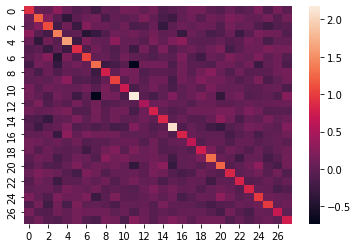

In [32]:
sb.heatmap(np.cov(X[0], rowvar=True))

In [34]:
!mkdir -p ./data/phy

In [35]:
for i in range(0, 60000, 10000):
    with open(f"./data/phy/train_EA_{i//10000}.pkl", mode="wb") as f:
        pkl.dump((X[i:i+10000], Y[i:i+10000]), f)

In [ ]:
Xtrain = list()
Ytrain = list()
Xvalid = list()
Yvalid = list()
Xtest = list()
Ytest = list()

valid_subjects = set([f"PHY_{i}" for i in range(1, 31)])
test_subjects = set(["PHY_1"])

for subject in phy_ds_info["subject"].unique():
    Xsub = list()
    Ysub = list()
    is_training = list()
    for i, r in phy_ds_info[phy_ds_info["subject"] == subject].iterrows():
        x = phy_ds.datasets[i].windows.get_data()
        y = [label_map[r["label"]]] * len(x)
        Xsub.append(x)
        Ysub.extend(y)
        if r["trial"] in train_trials:
            is_training.extend([True] * len(x))
        else:
            is_training.extend([False] * len(x))

    Xsub = np.concatenate(Xsub, axis=0)
    Ysub = np.array(Ysub, dtype=int)
    is_training = np.array(is_training, dtype=bool)

    Xsub = np_euclidean_alignment(Xsub)

    if subject in test_subjects:
        Xtest.append(Xsub)
        Ytest.append(Ysub)
    elif subject in valid_subjects:
        train_idx = np.where(is_training)[0]
        Xtrain.append(Xsub[train_idx])
        Ytrain.append(Ysub[train_idx])
        valid_idx = np.where(~is_training)[0]
        if len(valid_idx) > 0:
            Xvalid.append(Xsub[valid_idx])
            Yvalid.append(Ysub[valid_idx])
    else:
        Xtrain.append(Xsub)
        Ytrain.append(Ysub)

Xtrain = np.concatenate(Xtrain, axis=0)
Ytrain = np.concatenate(Ytrain, axis=0)
Xvalid = np.concatenate(Xvalid, axis=0)
Yvalid = np.concatenate(Yvalid, axis=0)
Xtest = np.concatenate(Xtest, axis=0)
Ytest = np.concatenate(Ytest, axis=0)

print(Xtrain.shape, np.bincount(Ytrain))
print(Xvalid.shape, np.bincount(Yvalid))
print(Xtest.shape, np.bincount(Ytest))

(44565, 28, 256) [25470  6360  6420  6315]
(4560, 28, 256) [2610  645  663  642]
(477, 28, 256) [270  72  69  66]


In [ ]:
for i in range(0, 50000, 10000):
    with open(f"./data/train_EA_{i//10000}.pkl", mode="wb") as f:
        pkl.dump((Xtrain[i:i+10000], Ytrain[i:i+10000]), f)

with open("./data/valid_EA.pkl", mode="wb") as f:
    pkl.dump((Xvalid, Yvalid), f)

with open("./data/test_EA.pkl", mode="wb") as f:
    pkl.dump((Xtest, Ytest), f)

In [ ]:
target_subject = "PHY_1"  # @param

Xtrain_tgt = list()
Ytrain_tgt = list()

# compute label alignment transform matrices
for i, r in phy_ds_info[phy_ds_info["subject"] == target_subject].iterrows():
    x = phy_ds.datasets[i].windows.get_data()
    y = [label_map[r["label"]]] * len(x)
    Xtrain_tgt.append(x)
    Ytrain_tgt.extend(y)

Xtrain_tgt = np.concatenate(Xtrain_tgt, axis=0)
Ytrain_tgt = np.array(Ytrain_tgt, dtype=int)

Xtrain_tgt.shape, np.bincount(Ytrain_tgt)

((477, 28, 256), array([270,  72,  69,  66]))

In [ ]:
tgt_transform_mats = np_compute_target_transform_mats(Xtrain_tgt, Ytrain_tgt)

In [ ]:
Xtrain_src = list()
Ytrain_src = list()

for subject in phy_ds_info["subject"].unique():
    if subject == target_subject:
        continue

    Xsub = list()
    Ysub = list()
    for i, r in phy_ds_info[phy_ds_info["subject"] == subject].iterrows():
        x = phy_ds.datasets[i].windows.get_data()
        y = [label_map[r["label"]]] * len(x)
        Xsub.append(x)
        Ysub.extend(y)

    Xsub = np.concatenate(Xsub, axis=0)
    Ysub = np.array(Ysub, dtype=int)

    # Xsub = np_label_alignment(Xsub, Ysub, tgt_transform_mats)
    Xsub = np_euclidean_alignment(Xsub)

    Xtrain_src.append(Xsub)
    Ytrain_src.append(Ysub)

Xtrain_src = np.concatenate(Xtrain_src)
Ytrain_src = np.concatenate(Ytrain_src)

Xtrain_src.shape, np.bincount(Ytrain_src)

((49125, 28, 256), array([28080,  7005,  7083,  6957]))

In [ ]:
Xtrain_tgt = list()
Ytrain_tgt = list()

# compute label alignment transform matrices
for i, r in phy_ds_info[phy_ds_info["subject"] == target_subject].iterrows():
    x = phy_ds.datasets[i].windows.get_data()
    y = [label_map[r["label"]]] * len(x)
    Xtrain_tgt.append(x)
    Ytrain_tgt.extend(y)

Xtrain_tgt = np.concatenate(Xtrain_tgt, axis=0)
Ytrain_tgt = np.array(Ytrain_tgt, dtype=int)

Xtrain_tgt.shape, np.bincount(Ytrain_tgt)

((477, 28, 256), array([270,  72,  69,  66]))

In [ ]:
Xtrain_tgt = list()
Ytrain_tgt = list()
splitter_idx = list()

for i, r in phy_ds_info[phy_ds_info["subject"] == target_subject].iterrows():
    x = phy_ds.datasets[i].windows.get_data()
    y = [label_map[r["label"]]] * len(x)

    sidx = 0
    if r["trial"] in valid_trials:
        sidx = 1
    elif r["trial"] in test_trials:
        sidx = 2

    Xtrain_tgt.append(x)
    Ytrain_tgt.extend(y)
    splitter_idx.extend([sidx] * len(x))

Xtrain_tgt = np.concatenate(Xtrain_tgt, axis=0)
Ytrain_tgt = np.array(Ytrain_tgt, dtype=int)
splitter_idx = np.array(splitter_idx, dtype=int)

Xtrain_tgt = np_euclidean_alignment(Xtrain_tgt)

print(np.bincount(splitter_idx))
Xtrain_tgt.shape

[  0 159 318]


(477, 28, 256)

In [ ]:
idx = np.where(splitter_idx == 1)[0]
Xvalid_tgt = Xtrain_tgt[idx]
Yvalid_tgt = Ytrain_tgt[idx]
idx = np.where(splitter_idx == 2)[0]
Xtest_tgt = Xtrain_tgt[idx]
Ytest_tgt = Ytrain_tgt[idx]
idx = np.where(splitter_idx == 0)[0]
Xtrain_tgt = Xtrain_tgt[idx]
Ytrain_tgt = Ytrain_tgt[idx]

print(Xtrain_tgt.shape, np.bincount(Ytrain_tgt))
print(Xvalid_tgt.shape, np.bincount(Yvalid_tgt))
print(Xtest_tgt.shape, np.bincount(Ytest_tgt))

(0, 28, 256) []
(159, 28, 256) [90 24 24 21]
(318, 28, 256) [180  48  45  45]


In [ ]:
!rm -rf ./data/PHY_1_*

In [ ]:
for i in range(0, 50000, 10000):
    with open(f"./data/PHY_1_src_{i:06d}.pkl", mode="wb") as f:
        pkl.dump((Xtrain_src[i:i+10000], Ytrain_src[i:i+10000]), f)

with open("./data/PHY_1_tgt.pkl", mode="wb") as f:
    pkl.dump((Xtrain_tgt, Ytrain_tgt, Xvalid_tgt, Yvalid_tgt, Xtest_tgt, Ytest_tgt), f)

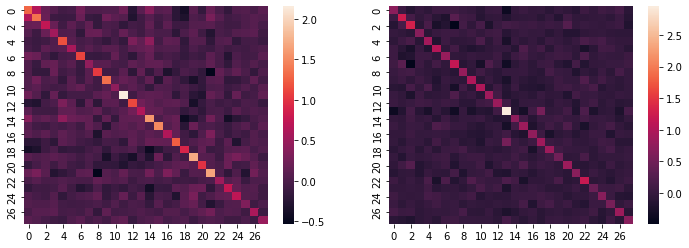

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

x = Xtrain_src[0]

x = x - x.mean(axis=1, keepdims=True)
x = (x @ x.T) / (x.shape[1] - 1)  # [C,C]

# diag = np.diagonal(x, axis1=1, axis2=0)[:, None]  # [C,1]
# x /= np.sqrt(diag @ diag.T)  # [C,C] \in [-1, 1]
# x /= 2.0
# x += 0.5

sb.heatmap(x, ax=axes[0])

x = Xtest_tgt[0]

x = x - x.mean(axis=1, keepdims=True)
x = (x @ x.T) / (x.shape[1] - 1)  # [C,C]

# diag = np.diagonal(x, axis1=1, axis2=0)[:, None]  # [C,1]
# x /= np.sqrt(diag @ diag.T)  # [C,C] \in [-1, 1]
# x /= 2.0
# x += 0.5

sb.heatmap(x, ax=axes[1])

#### load physionet data

In [ ]:
Xtrain_src = list()
Ytrain_src = list()
for i in range(0, 50000, 10000):
    with open(f"./data/PHY_1_src_{i:06d}.pkl", mode="rb") as f:
        x, y = pkl.load(f)
        Xtrain_src.append(x)
        Ytrain_src.append(y)

Xtrain_src = np.concatenate(Xtrain_src, axis=0)
Ytrain_src = np.concatenate(Ytrain_src, axis=0)

Xtrain_src.shape, np.bincount(Ytrain_src)

((49125, 28, 256), array([28080,  7005,  7083,  6957]))

In [ ]:
with open("./data/PHY_1_tgt.pkl", mode="rb") as f:
    Xtrain_tgt, Ytrain_tgt, Xvalid_tgt, Yvalid_tgt, Xtest_tgt, Ytest_tgt = pkl.load(f)

print(Xtrain_tgt.shape, np.bincount(Ytrain_tgt))
print(Xvalid_tgt.shape, np.bincount(Yvalid_tgt))
print(Xtest_tgt.shape, np.bincount(Ytest_tgt))

(0, 28, 256) []
(159, 28, 256) [90 24 24 21]
(318, 28, 256) [180  48  45  45]


In [ ]:
Xunlabeled_tgt = np.concatenate((Xvalid_tgt, Xtest_tgt), axis=0)
Yunlabeled_tgt = np.concatenate((Yvalid_tgt, Ytest_tgt), axis=0)

Xunlabeled_tgt.shape, np.bincount(Yunlabeled_tgt)

((477, 28, 256), array([270,  72,  69,  66]))

In [ ]:
Xtrain = list()
Ytrain = list()
for i in range(5):
    with open(f"./data/train_{i}.pkl", mode="rb") as f:
        x, y = pkl.load(f)
    Xtrain.append(x)
    Ytrain.append(y)

Xtrain = np.concatenate(Xtrain, axis=0)
Ytrain = np.concatenate(Ytrain, axis=0)

with open("./data/valid.pkl", mode="rb") as f:
    Xvalid, Yvalid = pkl.load(f)

with open("./data/test.pkl", mode="rb") as f:
    Xtest, Ytest = pkl.load(f)

print(Xtrain.shape, np.bincount(Ytrain))
print(Xvalid.shape, np.bincount(Yvalid))
print(Xtest.shape, np.bincount(Ytest))

(44565, 28, 256) [25470  6360  6420  6315]
(4560, 28, 256) [2610  645  663  642]
(477, 28, 256) [270  72  69  66]


#### gen VINIF data

In [ ]:
with open("./data/vin/5classes-EA.pkl", mode="rb") as f:
    exp_ds = pkl.load(f)
    
ds_info = exp_ds.description
ds_info

,subject,scenario,event,label,trial,split
0,K001,nâng tay trái,Thinking,nâng tay trái,0,train
1,K001,nâng tay trái,Resting,rest,0,train
2,K001,nâng tay trái,Resting,rest,1,train
3,K001,nâng tay trái,Thinking,nâng tay trái,1,train
4,K001,nâng tay trái,Thinking,nâng tay trái,2,train
...,...,...,...,...,...,...
2444,K375,nâng chân phải,Resting,rest,0,train
2445,K375,nâng chân phải,Thinking,nâng chân phải,1,train
2446,K375,nâng chân phải,Resting,rest,1,train
2447,K375,nâng chân phải,Thinking,nâng chân phải,2,train


In [ ]:
# subjects = [
#     'K300', 'K309', 'K310', 'K311', 'K312', 
#     'K313', 'K314', 'K315', 'K316', 'K319', 
#     'K320', 'K321', 'K322', 'K323', 'K324', 
#     'K325', 'K326', 'K327', 'K328', 'K329', 
#     'K330', 'K331', 'K332', 'K333', 'K334', 
#     'K335', 'K336', 'K337', 'K338', 'K339', 
#     'K340', 'K342', 'K343', 'K344', 'K350', 
#     'K351', 'K352', 'K353', 'K354', 'K355', 
#     'K356', 'K357', 'K358', 'K359', 'K360', 
#     'K361', 'K362', 'K363', 'K364', 'K365', 
#     'K366', 'K367', 'K368', 'K369', 'K370', 
#     'K371', 'K372', 'K373', 'K374', 'K375',
# ]

# target_subject = "K309"  # @param

# exp_ds = deepcopy(ds)
# label_alignment(exp_ds, target_subject=target_subject, labeled_trials={
#     "rest": [0],
#     "nâng tay trái": [0],
#     "nâng tay phải": [0],
# })
# euclidean_alignment(exp_ds, target_subject=None, labeled_trials=None)

In [ ]:
valid_trials_map = {
    "rest": [4, 5],
    "nâng tay trái": [2],
    "nâng tay phải": [2],
    "nâng chân trái": [2],
    "nâng chân phải": [2],
    "gật đầu": [2],
    "lắc đầu": [2],
}

test_subjects = {
    'K300', 'K309', 'K310', 'K311', 'K312', 
    'K313', 'K314', 'K315', 'K316', 'K319', 
    # 'K320', 'K321', 'K322', 'K323', 'K324', 
    # 'K325', 'K326', 'K327', 'K328', 'K329', 
    # 'K330', 'K331', 'K332', 'K333', 'K334', 
    # 'K335', 'K336', 'K337', 'K338', 'K339', 
    # 'K340', 'K342', 'K343', 'K344', 'K350', 
    # 'K351', 'K352', 'K353', 'K354', 'K355', 
    # 'K356', 'K357', 'K358', 'K359', 'K360', 
    # 'K361', 'K362', 'K363', 'K364', 'K365', 
    # 'K366', 'K367', 'K368', 'K369', 'K370', 
    # 'K371', 'K372', 'K373', 'K374', 'K375',
}
test_subject_data = defaultdict(list)

list_of_train_ds = list()
list_of_valid_ds = list()
# list_of_test_ds = list()
for _ds in exp_ds.datasets:
    _ds_info = _ds.description
    # if _ds_info["subject"] == target_subject:
    if _ds_info["subject"] in test_subjects:
        test_subject_data[_ds_info["subject"]].append(_ds)
    #     list_of_test_ds.append(_ds)
    # elif _ds_info["subject"] in valid_subjects and _ds_info["trial"] in valid_trials_map[_ds_info["label"]]:
    elif _ds_info["trial"] in valid_trials_map[_ds_info["label"]]:
        list_of_valid_ds.append(_ds)
    else:
        list_of_train_ds.append(_ds)
        
train_ds = BaseConcatDataset(list_of_train_ds)
valid_ds = BaseConcatDataset(list_of_valid_ds)
# test_ds = BaseConcatDataset(list_of_test_ds)

print(len(train_ds))
print(len(valid_ds))
# print(len(test_ds))

list_of_test_ds = list()
for k, v in test_subject_data.items():
    kds = BaseConcatDataset(v)
    print(f"{k}: {len(kds)}")
    list_of_test_ds.append((k, kds))

27730
11694
K300: 712
K309: 647
K310: 738
K311: 717
K312: 740
K313: 729
K314: 659
K315: 762
K316: 755
K319: 711


In [ ]:
train_trials_map = {
    "rest": [0],
    "nâng tay trái": [0],
    "nâng tay phải": [0],
}
valid_trials_map = {
    "rest": [1, 2],
    "nâng tay trái": [1],
    "nâng tay phải": [1],
}
test_trials_map = {
    "rest": [3, 4],
    "nâng tay trái": [2],
    "nâng tay phải": [2],
}

list_of_train_src_ds = list()
list_of_train_tgt_ds = list()
list_of_valid_tgt_ds = list()
list_of_test_tgt_ds = list()
for _ds in exp_ds.datasets:
    _ds_info = _ds.description
    if _ds_info["subject"] == target_subject:
        if _ds_info["trial"] in train_trials_map[_ds_info["label"]]:
            list_of_train_tgt_ds.append(_ds)
        elif _ds_info["trial"] in valid_trials_map[_ds_info["label"]]:
            list_of_valid_tgt_ds.append(_ds)
        else:
            list_of_test_tgt_ds.append(_ds)
    else:
        list_of_train_src_ds.append(_ds)

train_src_ds = BaseConcatDataset(list_of_train_src_ds)
train_tgt_ds = BaseConcatDataset(list_of_train_tgt_ds)
valid_tgt_ds = BaseConcatDataset(list_of_valid_tgt_ds)
test_tgt_ds = BaseConcatDataset(list_of_test_tgt_ds)
unlabeled_tgt_ds = BaseConcatDataset(list_of_valid_tgt_ds + list_of_test_tgt_ds)

In [ ]:
print(len(train_src_ds))
print(len(train_tgt_ds))
print(len(valid_tgt_ds))
print(len(test_tgt_ds))
print(len(unlabeled_tgt_ds))

23444
111
175
111
286


#### load physionet & VINIF data

In [24]:
Xsrc = list()
Ysrc = list()
for i in range(4):
    with open(f"./data/phy/train_EA_{i}.pkl", mode="rb") as f:
        x, y = pkl.load(f)
    Xsrc.append(x)
    Ysrc.append(y)

Xsrc = np.concatenate(Xsrc, axis=0)
Ysrc = np.concatenate(Ysrc, axis=0)

print(Xsrc.shape, np.bincount(Ysrc))

(40000, 28, 256) [20001  4974  5016  5061  4948]


In [25]:
with open("./data/vin/5classes-EA.pkl", mode="rb") as f:
    exp_ds = pkl.load(f)
    
ds_info = exp_ds.description
ds_info

,subject,scenario,event,label,trial,split
0,K001,nâng tay trái,Thinking,nâng tay trái,0,train
1,K001,nâng tay trái,Resting,rest,0,train
2,K001,nâng tay trái,Resting,rest,1,train
3,K001,nâng tay trái,Thinking,nâng tay trái,1,train
4,K001,nâng tay trái,Resting,rest,2,train
...,...,...,...,...,...,...
2749,K375,nâng chân phải,Resting,rest,2,train
2750,K375,nâng chân phải,Resting,rest,3,train
2751,K375,nâng chân phải,Thinking,nâng chân phải,2,train
2752,K375,nâng chân phải,Resting,rest,4,train


In [26]:
valid_trials_map = {
    "rest": [4, 5],
    "nâng tay trái": [2],
    "nâng tay phải": [2],
    "nâng chân trái": [2],
    "nâng chân phải": [2],
    "gật đầu": [2],
    "lắc đầu": [2],
}

test_subjects = {
    'K300', 
    # 'K309', 'K310', 'K311', 'K312', 
    # 'K313', 'K314', 'K315', 'K316', 'K319', 
    # 'K320', 'K321', 'K322', 'K323', 'K324', 
    # 'K325', 'K326', 'K327', 'K328', 'K329', 
    # 'K330', 'K331', 'K332', 'K333', 'K334', 
    # 'K335', 'K336', 'K337', 'K338', 'K339', 
    # 'K340', 'K342', 'K343', 'K344', 'K350', 
    # 'K351', 'K352', 'K353', 'K354', 'K355', 
    # 'K356', 'K357', 'K358', 'K359', 'K360', 
    # 'K361', 'K362', 'K363', 'K364', 'K365', 
    # 'K366', 'K367', 'K368', 'K369', 'K370', 
    # 'K371', 'K372', 'K373', 'K374', 'K375',
}
test_subject_data = defaultdict(list)

list_of_train_ds = list()
list_of_valid_ds = list()
# list_of_test_ds = list()
for _ds in exp_ds.datasets:
    _ds_info = _ds.description
    # if _ds_info["subject"] == target_subject:
    if _ds_info["subject"] in test_subjects:
        test_subject_data[_ds_info["subject"]].append(_ds)
    #     list_of_test_ds.append(_ds)
    # elif _ds_info["subject"] in valid_subjects and _ds_info["trial"] in valid_trials_map[_ds_info["label"]]:
    elif _ds_info["trial"] in valid_trials_map[_ds_info["label"]]:
        list_of_valid_ds.append(_ds)
    else:
        list_of_train_ds.append(_ds)
        
train_ds = BaseConcatDataset(list_of_train_ds)
valid_ds = BaseConcatDataset(list_of_valid_ds)
# test_ds = BaseConcatDataset(list_of_test_ds)

print(len(train_ds))
print(len(valid_ds))
# print(len(test_ds))

list_of_test_ds = list()
for k, v in test_subject_data.items():
    kds = BaseConcatDataset(v)
    print(f"{k}: {len(kds)}")
    list_of_test_ds.append((k, kds))

17126
7480
K300: 366


#### training module

In [ ]:
%%time
exp = "baseline"  # @param
n_classes = 5  # @param
n_channels = 32  # @param
n_samples = 256  # @param
top_k = 4  # @param
use_augmentation = False  # @param {"type": "boolean"}
use_normalization = True  # @param {"type": "boolean"}
epochs = 50  # @param
batch_size = 64  # @param
lr = 1e-3  # @param
use_lr_sch = False  # @param {"type": "boolean"}
weight_decay = 1e-2  # @param
smooth_label = 0.05  # @param
after_n_epochs = 10  # @param
mixup_alpha = 0.4  # @param
use_class_weight = True  # @param {"type": "boolean"}
use_imbalanced_sampler = False  # @param {"type": "boolean"}
drop_prob = 0.25  # @param
monitor_val = "acc"  # @param
monitor_max_is_best = True  # @param {"type": "boolean"}
patience_epochs = 10  # @param

do_training(
    exp=exp,
    n_classes=n_classes,
    n_channels=n_channels,
    n_samples=n_samples,
    # train_data=(Xtrain, Ytrain), 
    # valid_data=(Xvalid, Yvalid), 
    # test_data=(Xtest, Ytest),
    train_data=train_ds,
    valid_data=valid_ds,
    # test_data=test_ds,
    test_data=list_of_test_ds,
    top_k=top_k,
    use_augmentation=use_augmentation,
    use_normalization=use_normalization,
    epochs=epochs,
    batch_size=batch_size,
    lr=lr,
    use_lr_sch=use_lr_sch,
    weight_decay=weight_decay,
    smooth_label=smooth_label,
    after_n_epochs=after_n_epochs,
    mixup_alpha=mixup_alpha,
    use_class_weight=use_class_weight,
    use_imbalanced_sampler=use_imbalanced_sampler,
    drop_prob=drop_prob,
    monitor_val=monitor_val,
    monitor_max_is_best=monitor_max_is_best,
    patience_epochs=patience_epochs,
)

/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/connectors/callback_connector.py:59: LightningDeprecationWarning: Setting `Trainer(stochastic_weight_avg=True)` is deprecated in v1.5 and will be removed in v1.7. Please pass `pytorch_lightning.callbacks.stochastic_weight_avg.StochasticWeightAveraging` directly to the Trainer's `callbacks` argument instead.
  "Setting `Trainer(stochastic_weight_avg=True)` is deprecated in v1.5 and will be removed in v1.7."
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


"after_n_epochs": 10
"class_weight":   tensor([0.3426, 2.3460, 1.6169, 2.3391, 1.6423], device='cuda:0')
"drop_prob":      0.25
"epochs":         50
"lr":             0.001
"mixup_alpha":    0.4
"n_channels":     32
"n_classes":      5
"n_samples":      256
"rng_seed":       42
"smooth_label":   0.05
"use_lr_sch":     False
"weight_decay":   0.01
MotorImageryModule(
  (base_model): Sequential(
    (0): InstanceNorm1d(32, eps=0.001, momentum=0.01, affine=True, track_running_stats=False)
    (1): MB_EEGNet(
      (conv_1s): ModuleList(
        (0): ConvTS(
          (conv_temporal): Conv2d(1, 8, kernel_size=(1, 64), stride=(1, 1), padding=(0, 32), bias=False)
          (bnorm_temporal): BatchNorm2d(8, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
          (conv_spatial): Conv2dWithConstraint(8, 32, kernel_size=(32, 1), stride=(1, 1), groups=8, bias=False)
          (bnorm_1): BatchNorm2d(32, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
          (e


  | Name       | Type          | Params
---------------------------------------------
0 | base_model | Sequential    | 3.3 K 
1 | clf        | EEGClassifier | 1.3 K 
---------------------------------------------
4.6 K     Trainable params
0         Non-trainable params
4.6 K     Total params
0.018     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
Global seed set to 42


Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

training baseline done - time: 0:10:19.408206s


/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/trainer.py:688: UserWarning: Detected KeyboardInterrupt, attempting graceful shutdown...
  rank_zero_warn("Detected KeyboardInterrupt, attempting graceful shutdown...")


baseline validation:
{'acc': 0.4756442806424874, 'f1': 0.608330629936598, 'kappa': 0.42962542058581843}
baseline validation confusion_matrix:
[[4473  247  359  221  435]
 [  47  535  360  235   75]
 [  59  428  761  295  208]
 [  59  232  291  448  198]
 [  90  107  400  489  642]]
testing on K300...
baseline test:
{'acc': 0.43255555912634797, 'f1': 0.6453241947092969, 'kappa': 0.376514928614462}
baseline test confusion_matrix:
[[380  23  14  15  26]
 [  0  33  11   3   0]
 [ 13  27  12   1   6]
 [ 12   7  16   4  16]
 [ 41   4   4  11  33]]
testing on K309...
baseline test:
{'acc': 0.4843807303357487, 'f1': 0.6361867234551576, 'kappa': 0.38815096083045775}
baseline test confusion_matrix:
[[286  14  40   5  78]
 [  0  17  17  25   0]
 [  0  27   5  19   0]
 [  0  11  11  25  11]
 [  1   0   0   3  52]]
testing on K310...
baseline test:
{'acc': 0.3751082813582814, 'f1': 0.5785683635201557, 'kappa': 0.3000154855265632}
baseline test confusion_matrix:
[[319   4  64  24  70]
 [  1   0  41 

In [28]:
%%time
exp = "multidatasets"  # @param
n_classes = 5  # @param
n_channels = 28  # @param
n_samples = 256  # @param
n_src_classes = 4  # @param
top_k = 4  # @param
use_augmentation = False  # @param {"type": "boolean"}
use_normalization = True  # @param {"type": "boolean"}
epochs = 30  # @param
batch_size = 64  # @param
lr = 1e-3  # @param
use_lr_sch = True  # @param {"type": "boolean"}
weight_decay = 1e-2  # @param
smooth_label = 0.0  # @param
src_loss_scale = 1.0  # @param
tgt_loss_scale = 0.2  # @param
src_loss_scale_after_n = 0.2  # @param
tgt_loss_scale_after_n = 1.0  # @param
after_n_epochs = 10  # @param
src_mixup_alpha = 0.0  # @param
tgt_mixup_alpha = 0.0  # @param
use_class_weight = True  # @param {"type": "boolean"}
use_imbalanced_sampler = False  # @param {"type": "boolean"}
drop_prob = 0.25  # @param
monitor_val = "acc"  # @param
monitor_max_is_best = True  # @param {"type": "boolean"}
patience_epochs = 10  # @param

do_md_training(
    exp=exp,
    n_classes=n_classes,
    n_channels=n_channels,
    n_samples=n_samples,
    n_src_classes=n_src_classes,
    train_src_data=(Xsrc, Ysrc),
    train_tgt_data=train_ds,
    valid_tgt_data=valid_ds,
    # test_tgt_data=test_ds,
    test_tgt_data=list_of_test_ds,
    top_k=top_k,
    use_augmentation=use_augmentation,
    use_normalization=use_normalization,
    epochs=epochs,
    batch_size=batch_size,
    lr=lr,
    use_lr_sch=use_lr_sch,
    weight_decay=weight_decay,
    smooth_label=smooth_label,
    src_loss_scale=src_loss_scale,
    tgt_loss_scale=tgt_loss_scale,
    src_loss_scale_after_n=src_loss_scale_after_n,
    tgt_loss_scale_after_n=tgt_loss_scale_after_n,
    after_n_epochs=after_n_epochs,
    src_mixup_alpha=src_mixup_alpha,
    tgt_mixup_alpha=tgt_mixup_alpha,
    use_class_weight=use_class_weight,
    use_imbalanced_sampler=use_imbalanced_sampler,
    drop_prob=drop_prob,
    monitor_val=monitor_val,
    monitor_max_is_best=monitor_max_is_best,
    patience_epochs=patience_epochs,
)

/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/connectors/callback_connector.py:59: LightningDeprecationWarning: Setting `Trainer(stochastic_weight_avg=True)` is deprecated in v1.5 and will be removed in v1.7. Please pass `pytorch_lightning.callbacks.stochastic_weight_avg.StochasticWeightAveraging` directly to the Trainer's `callbacks` argument instead.
  "Setting `Trainer(stochastic_weight_avg=True)` is deprecated in v1.5 and will be removed in v1.7."
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs


"after_n_epochs":         10
"drop_prob":              0.25
"epochs":                 30
"lr":                     0.001
"n_channels":             28
"n_classes":              5
"n_samples":              256
"n_src_classes":          4
"rng_seed":               42
"smooth_label":           0.0
"src_class_weight":       tensor([0.4374, 1.7522, 1.7339, 1.7657], device='cuda:0')
"src_loss_scale":         1.0
"src_loss_scale_after_n": 0.2
"src_mixup_alpha":        0.0
"tgt_class_weight":       tensor([0.3318, 2.4642, 1.6943, 2.4460, 1.7207], device='cuda:0')
"tgt_loss_scale":         0.2
"tgt_loss_scale_after_n": 1.0
"tgt_mixup_alpha":        0.0
"use_lr_sch":             True
"weight_decay":           0.01
MultiDatasetsMotorImageryModule(
  (base_model): MB_EEGNet(
    (conv_1s): ModuleList(
      (0): ConvTS(
        (conv_temporal): Conv2d(1, 8, kernel_size=(1, 16), stride=(1, 1), padding=(0, 8), bias=False)
        (bnorm_temporal): BatchNorm2d(8, eps=0.001, momentum=0.01, affine=True,

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type          | Params
---------------------------------------------
0 | base_model | MB_EEGNet     | 5.4 K 
1 | clf        | EEGClassifier | 1.3 K 
2 | src_clf    | EEGClassifier | 1.0 K 
---------------------------------------------
7.7 K     Trainable params
0         Non-trainable params
7.7 K     Total params
0.031     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
Global seed set to 42


Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Swapping scheduler `MultiStepLR` for `SWALR`


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

training MD/multidatasets done - time: 0:42:22.164391s
MD/multidatasets validation:
{'acc': 0.5033955238631223, 'f1': 0.668966947879558, 'kappa': 0.5067692312091996}
MD/multidatasets validation confusion_matrix:
[[3100   48   61   59   74]
 [  42  331  144   95   31]
 [  92  262  301  132  111]
 [  67   98  166  214   88]
 [ 122   64  166  179  356]]
testing on K300...
MD/multidatasets test:
{'acc': 0.41545197740112993, 'f1': 0.672750670961828, 'kappa': 0.42637960900767136}
MD/multidatasets test confusion_matrix:
[[209   2   6   4  15]
 [  0   4  17   3   0]
 [  2   2  17   0   9]
 [  8   3  14   0   3]
 [ 21   0   3   2  22]]
testing on K309...
MD/multidatasets test:
{'acc': 0.48183908045977014, 'f1': 0.706649664626376, 'kappa': 0.45903509161741396}
MD/multidatasets test confusion_matrix:
[[176   2  17   3  18]
 [  0  15   8   7   0]
 [  0   2  14  10   1]
 [  1   5   4   9  11]
 [  0   0   0  21   8]]
testing on K310...
MD/multidatasets test:
{'acc': 0.3485921758732819, 'f1': 0.62560

In [ ]:
%%time
# exp = ""  # @param
exp = target_subject
n_classes = 3  # @param
n_channels = 28  # @param
n_samples = 256  # @param
top_k = 4  # @param
use_augmentation = False  # @param {"type": "boolean"}
use_normalization = True  # @param {"type": "boolean"}
mcd_step_C_steps = 10  # @param
epochs = 30  # @param
batch_size = 64  # @param
lr = 1e-3  # @param
use_lr_sch = False  # @param {"type": "boolean"}
weight_decay = 0.0  # @param
smooth_label = 0.1  # @param
src_loss_scale = 1.0  # @param
tgt_loss_scale = 0.5  # @param
src_loss_scale_after_n = 0.5  # @param
tgt_loss_scale_after_n = 1.0  # @param
after_n_epochs = 10  # @param
src_mixup_alpha = 0.0  # @param
tgt_mixup_alpha = 0.0  # @param
use_class_weight = True  # @param {"type": "boolean"}
use_imbalanced_sampler = False  # @param {"type": "boolean"}
drop_prob = 0.25  # @param
monitor_val = "acc"  # @param
monitor_max_is_best = True  # @param {"type": "boolean"}
patience_epochs = 10  # @param

do_mcd_training(
    exp=exp,
    n_classes=n_classes,
    n_channels=n_channels,
    n_samples=n_samples,
    train_src_data=train_ds, 
    valid_tgt_data=valid_ds, 
    unlabeled_tgt_data=test_ds,
    test_tgt_data=test_ds,
    # train_src_data=(Xtrain, Ytrain), 
    # valid_tgt_data=(Xvalid, Yvalid), 
    # unlabeled_tgt_data=(Xtest, Ytest),
    # test_tgt_data=(Xtest, Ytest),
    # train_src_data=(Xtrain_src, Ytrain_src), 
    # train_tgt_data=(Xtrain_tgt, Ytrain_tgt), 
    # valid_tgt_data=(Xvalid_tgt, Yvalid_tgt), 
    # unlabeled_tgt_data=(Xunlabeled_tgt, Yunlabeled_tgt),
    # test_tgt_data=(Xtest_tgt, Ytest_tgt),
    # train_src_data=train_src_ds,
    # train_tgt_data=train_tgt_ds,
    # valid_tgt_data=valid_tgt_ds,
    # unlabeled_tgt_data=unlabeled_tgt_ds,
    # test_tgt_data=test_tgt_ds,
    top_k=top_k,
    use_augmentation=use_augmentation,
    use_normalization=use_normalization,
    mcd_step_C_steps=mcd_step_C_steps,
    epochs=epochs,
    batch_size=batch_size,
    lr=lr,
    use_lr_sch=use_lr_sch,
    weight_decay=weight_decay,
    smooth_label=smooth_label,
    src_loss_scale=src_loss_scale,
    tgt_loss_scale=tgt_loss_scale,
    src_loss_scale_after_n=src_loss_scale_after_n,
    tgt_loss_scale_after_n=tgt_loss_scale_after_n,
    after_n_epochs=after_n_epochs,
    src_mixup_alpha=src_mixup_alpha,
    tgt_mixup_alpha=tgt_mixup_alpha,
    use_class_weight=use_class_weight,
    use_imbalanced_sampler=use_imbalanced_sampler,
    drop_prob=drop_prob,
    monitor_val=monitor_val,
    monitor_max_is_best=monitor_max_is_best,
    patience_epochs=patience_epochs,
)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs


"after_n_epochs":         100
"drop_prob":              0.25
"epochs":                 30
"lr":                     0.001
"mcd_step_C_steps":       10
"n_channels":             28
"n_classes":              3
"n_samples":              256
"rng_seed":               42
"smooth_label":           0.1
"src_class_weight":       tensor([0.5544, 1.9770, 1.4481], device='cuda:0')
"src_loss_scale":         1.0
"src_loss_scale_after_n": 0.5
"src_mixup_alpha":        0.4
"tgt_loss_scale":         0.5
"tgt_loss_scale_after_n": 1.0
"tgt_mixup_alpha":        0.0
"use_lr_sch":             True
"weight_decay":           0.0
MCDMotorImageryModule(
  (base_model): MB_EEGNet(
    (conv_1s): ModuleList(
      (0): ConvTS(
        (conv_temporal): Conv2d(1, 8, kernel_size=(1, 64), stride=(1, 1), padding=(0, 32), bias=False)
        (bnorm_temporal): BatchNorm2d(8, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
        (conv_spatial): Conv2dWithConstraint(8, 32, kernel_size=(28, 1), stride=(

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type          | Params
---------------------------------------------
0 | base_model | MB_EEGNet     | 3.1 K 
1 | clf1       | EEGClassifier | 771   
2 | clf2       | EEGClassifier | 771   
---------------------------------------------
4.6 K     Trainable params
0         Non-trainable params
4.6 K     Total params
0.019     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

/home/txdat/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
Global seed set to 42


Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

training MCD/K300 done - time: 0:27:29.362551s
MCD/K300 validation:
{'acc': 0.6437213992488001, 'f1': 0.6966602463992795, 'kappa': 0.5010023059177291}
MCD/K300 validation confusion_matrix:
[[2907  175  597]
 [ 122  779  532]
 [ 210  561 1144]]
MCD/K300 test:
{'acc': 0.5314371856929183, 'f1': 0.5901127369992717, 'kappa': 0.3133584291382643}
MCD/K300 test confusion_matrix:
[[140  35  74]
 [  0  13  42]
 [ 16   3  74]]
CPU times: user 23min 7s, sys: 4min 12s, total: 27min 19s
Wall time: 27min 31s


In [ ]:
%%time
exp = "multidatasets"  # @param
# exp = target_subject
n_classes = 5  # @param
n_channels = 28  # @param
n_samples = 256  # @param
n_src_classes = 5  # @param
top_k = 4  # @param
use_augmentation = False  # @param {"type": "boolean"}
use_normalization = True  # @param {"type": "boolean"}
mcd_step_C_steps = 10  # @param
epochs = 30  # @param
batch_size = 64  # @param
lr = 1e-3  # @param
use_lr_sch = True  # @param {"type": "boolean"}
weight_decay = 1e-2  # @param
smooth_label = 0.1  # @param
src_loss_scale = 1.0  # @param
tgt_loss_scale = 0.2  # @param
src_loss_scale_after_n = 0.2  # @param
tgt_loss_scale_after_n = 1.0  # @param
after_n_epochs = 10  # @param
src_mixup_alpha = 0.0  # @param
tgt_mixup_alpha = 0.0  # @param
use_class_weight = True  # @param {"type": "boolean"}
use_imbalanced_sampler = False  # @param {"type": "boolean"}
drop_prob = 0.25  # @param
monitor_val = "acc"  # @param
monitor_max_is_best = True  # @param {"type": "boolean"}
patience_epochs = 10  # @param

list_of_unlabeled_ds = list()
# list_of_unlabeled_ds.extend(valid_ds.datasets)
for _, test_ds in list_of_test_ds:
    list_of_unlabeled_ds.extend(test_ds.datasets)

unlabeled_ds = BaseConcatDataset(list_of_unlabeled_ds)

do_md_mcd_training(
    exp=exp,
    n_classes=n_classes,
    n_channels=n_channels,
    n_samples=n_samples,
    n_src_classes=n_src_classes,
    train_src_data=(Xsrc, Ysrc), 
    train_tgt_data=train_ds, 
    valid_tgt_data=valid_ds, 
    unlabeled_tgt_data=unlabeled_ds,
    test_tgt_data=list_of_test_ds,
    top_k=top_k,
    use_augmentation=use_augmentation,
    use_normalization=use_normalization,
    mcd_step_C_steps=mcd_step_C_steps,
    epochs=epochs,
    batch_size=batch_size,
    lr=lr,
    use_lr_sch=use_lr_sch,
    weight_decay=weight_decay,
    smooth_label=smooth_label,
    src_loss_scale=src_loss_scale,
    tgt_loss_scale=tgt_loss_scale,
    src_loss_scale_after_n=src_loss_scale_after_n,
    tgt_loss_scale_after_n=tgt_loss_scale_after_n,
    after_n_epochs=after_n_epochs,
    src_mixup_alpha=src_mixup_alpha,
    tgt_mixup_alpha=tgt_mixup_alpha,
    use_class_weight=use_class_weight,
    use_imbalanced_sampler=use_imbalanced_sampler,
    drop_prob=drop_prob,
    monitor_val=monitor_val,
    monitor_max_is_best=monitor_max_is_best,
    patience_epochs=patience_epochs,
)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs


"after_n_epochs":         10
"drop_prob":              0.25
"epochs":                 30
"lr":                     0.001
"mcd_step_C_steps":       10
"n_channels":             28
"n_classes":              5
"n_samples":              256
"n_src_classes":          5
"rng_seed":               42
"smooth_label":           0.1
"src_class_weight":       tensor([0.4000, 1.6084, 1.5949, 1.5807, 1.6168], device='cuda:0')
"src_loss_scale":         1.0
"src_loss_scale_after_n": 0.2
"src_mixup_alpha":        0.0
"tgt_class_weight":       tensor([0.3290, 2.4155, 1.7665, 2.4104, 1.7683], device='cuda:0')
"tgt_loss_scale":         0.2
"tgt_loss_scale_after_n": 1.0
"tgt_mixup_alpha":        0.0
"use_lr_sch":             True
"weight_decay":           0.01
MultiDatasetsMCDMotorImageryModule(
  (base_model): MB_EEGNet(
    (conv_1s): ModuleList(
      (0): ConvTS(
        (conv_temporal): Conv2d(1, 8, kernel_size=(1, 64), stride=(1, 1), padding=(0, 32), bias=False)
        (bnorm_temporal): BatchNorm2d(

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type          | Params
---------------------------------------------
0 | base_model | MB_EEGNet     | 3.1 K 
1 | clf1       | EEGClassifier | 1.3 K 
2 | clf2       | EEGClassifier | 1.3 K 
3 | src_clf    | EEGClassifier | 1.3 K 
---------------------------------------------
6.9 K     Trainable params
0         Non-trainable params
6.9 K     Total params
0.028     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

/home/txdat/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
Global seed set to 42


Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

In [ ]:
# PHY_1-EA validation:
# {'acc': 0.44061238323946006, 'f1': 0.4881920148589359, 'kappa': 0.23390696741289352}
# PHY_1-EA validation confusion_matrix:
# [[1263  572  332  443]
#  [ 145  250   86  164]
#  [ 104  149  253  157]
#  [  95  133   87  327]]
# PHY_1-EA test:
# {'acc': 0.4009268408724931, 'f1': 0.4229364190292441, 'kappa': 0.17958402042661847}
# PHY_1-EA test confusion_matrix:
# [[101  89  29  51]
#  [ 10  31  15  16]
#  [ 11   6  29  23]
#  [  4  22  15  25]]

# PHY_1 validation:
# {'acc': 0.3932938640658058, 'f1': 0.3886584823409278, 'kappa': 0.15577668713729398}
# PHY_1-EA validation confusion_matrix:
# [[862 582 346 820]
#  [108 209  96 232]
#  [ 92 128 192 251]
#  [ 67  97  74 404]]
# PHY_1-EA test:
# {'acc': 0.4281025838091056, 'f1': 0.4269235364568036, 'kappa': 0.20224817314079935}
# PHY_1-EA test confusion_matrix:
# [[97 46 73 54]
#  [ 6 25 30 11]
#  [ 7  2 37 23]
#  [ 5 11 19 31]]

# MCD/PHY_1-EA validation:
# {'acc': 0.4514804627491238, 'f1': 0.5036479330743322, 'kappa': 0.25395520342825817}
# MCD/PHY_1-EA validation confusion_matrix:
# [[1360  291  457  502]
#  [ 142  145  139  219]
#  [ 125   46  330  162]
#  [  97   46  138  361]]
# MCD/PHY_1-EA test:
# {'acc': 0.49592391304347827, 'f1': 0.4986710894948685, 'kappa': 0.2791915762096556}
# MCD/PHY_1-EA test confusion_matrix:
# [[120  64  34  52]
#  [  5  31  29   7]
#  [  8   1  42  18]
#  [  9   5  19  33]]

# MCD/PHY_1 validation:
# {'acc': 0.38909483086910784, 'f1': 0.4558941985287379, 'kappa': 0.18123942164714058}
# MCD/PHY_1-EA validation confusion_matrix:
# [[1304  161  546  599]
#  [ 196   87  174  188]
#  [ 166   32  289  176]
#  [ 132   43  155  312]]
# MCD/PHY_1 test:
# {'acc': 0.38769488361879667, 'f1': 0.4141009968119698, 'kappa': 0.15871491474441446}
# MCD/PHY_1-EA test confusion_matrix:
# [[105  49  65  51]
#  [ 15  21  26  10]
#  [ 14   0  36  19]
#  [ 11   3  29  23]]

In [ ]:
# PHY_1-EA-MCD validation:
# {'acc': 0.44691630860815135, 'f1': 0.523282218837789, 'kappa': 0.2602947856796324}
# PHY_1-EA-MCD validation confusion_matrix:
# [[1505  435  293  377]
#  [ 163  203  106  173]
#  [ 151   97  239  176]
#  [ 143   84   71  344]]
# PHY_1-EA-MCD test:
# {'acc': 0.4276643244034548, 'f1': 0.3937438427158093, 'kappa': 0.18979515575636108}
# PHY_1-EA-MCD test confusion_matrix:
# [[80 83 34 73]
#  [ 4 24 22 22]
#  [ 4  4 38 23]
#  [ 2 10 19 35]]

# PHY_1-EA-MCD validation:
# {'acc': 0.45125740701107286, 'f1': 0.5272430130567776, 'kappa': 0.26725443399236803}
# PHY_1-EA-MCD validation confusion_matrix:
# [[1504  327  401  378]
#  [ 155  201  129  160]
#  [ 148   87  290  138]
#  [ 123   75  136  308]]
# PHY_1-EA-MCD test:
# {'acc': 0.47806415605328645, 'f1': 0.4598542601897231, 'kappa': 0.25011790598962436}
# PHY_1-EA-MCD test confusion_matrix:
# [[100  99  26  45]
#  [  2  43  11  16]
#  [  4   5  38  22]
#  [  7  14  19  26]]

# PHY_1-EA-MCD validation:
# {'acc': 0.4565619401864984, 'f1': 0.532004524625284, 'kappa': 0.2761062516231976}
# PHY_1-EA-MCD validation confusion_matrix:
# [[1553  184  409  464]
#  [ 185  137  140  183]
#  [ 149   38  313  163]
#  [ 119   39  133  351]]
# PHY_1-EA-MCD test:
# {'acc': 0.3934929000146391, 'f1': 0.42146499032052726, 'kappa': 0.1741739052565595}
# PHY_1-EA-MCD test confusion_matrix:
# [[106  78  38  48]
#  [ 12  16  30  14]
#  [  8   1  39  21]
#  [  9   6  25  26]]

# PHY_1-EA-MCD validation:
# {'acc': 0.4575056453367258, 'f1': 0.5153007630210196, 'kappa': 0.2636831533887558}
# PHY_1-EA-MCD validation confusion_matrix:
# [[1420  319  440  431]
#  [ 154  152  141  198]
#  [ 143   64  338  118]
#  [ 102   62  131  347]]
# PHY_1-EA-MCD test:
# {'acc': 0.46513321622017273, 'f1': 0.4299917388084218, 'kappa': 0.21787308533916838}
# PHY_1-EA-MCD test confusion_matrix:
# [[ 91 105  30  44]
#  [ 10  32  17  13]
#  [  8   3  41  17]
#  [  6   8  20  32]]

# PHY_1-EA-MCD validation:
# {'acc': 0.4573422959109794, 'f1': 0.4785221932849442, 'kappa': 0.24162278058513786}
# PHY_1-EA-MCD validation confusion_matrix:
# [[1183  267  548  612]
#  [ 106  158  140  241]
#  [ 110   35  341  177]
#  [  83   43  120  396]]
# PHY_1-EA-MCD test:
# {'acc': 0.49021373151807934, 'f1': 0.41116932930362754, 'kappa': 0.22948553877655486}
# PHY_1-EA-MCD test confusion_matrix:
# [[ 77 102  34  57]
#  [  3  44  16   9]
#  [  8   0  40  21]
#  [  5   9  20  32]]

In [ ]:
# PHY_1-LA-EA-MCD validation:
# {'acc': 0.639781746031746, 'f1': 0.5468033754382257, 'kappa': 0.38272403752830797}
# PHY_1-LA-EA-MCD validation confusion_matrix:
# [[38 10 26 16]
#  [ 6 11  2  5]
#  [ 0  0 22  2]
#  [ 2  0  3 16]]
# PHY_1-LA-EA-MCD test:
# {'acc': 0.5666666666666667, 'f1': 0.5272506420936317, 'kappa': 0.3296578563320902}
# PHY_1-LA-EA-MCD test confusion_matrix:
# [[39 26 18  7]
#  [ 5 16  3  0]
#  [ 3  1 14  3]
#  [ 0  1 11 12]]

# PHY_1-LA-EA-MCD validation:
# {'acc': 0.725, 'f1': 0.5863739990144327, 'kappa': 0.45352288704889854}
# PHY_1-LA-EA-MCD validation confusion_matrix:
# [[36 14 11 29]
#  [ 0 20  1  3]
#  [ 1  0 16  7]
#  [ 0  0  0 21]]
# PHY_1-LA-EA-MCD test:
# {'acc': 0.6742063492063491, 'f1': 0.5709739961589915, 'kappa': 0.41271880520314763}
# PHY_1-LA-EA-MCD test confusion_matrix:
# [[37 35  3 15]
#  [ 2 21  1  0]
#  [ 2  2 13  4]
#  [ 2  2  1 19]]

# PHY_1-LA-EA-MCD validation:
# {'acc': 0.752281746031746, 'f1': 0.6322155774529431, 'kappa': 0.5022285896211398}
# PHY_1-LA-EA-MCD validation confusion_matrix:
# [[41 12 25 12]
#  [ 0 21  3  0]
#  [ 0  1 22  1]
#  [ 0  0  5 16]]
# PHY_1-LA-EA-MCD test:
# {'acc': 0.7115079365079364, 'f1': 0.6206038128576921, 'kappa': 0.47138652714192275}
# PHY_1-LA-EA-MCD test confusion_matrix:
# [[44 22 15  9]
#  [ 1 20  1  2]
#  [ 2  0 18  1]
#  [ 2  1  5 16]]

# PHY_1-LA-EA-MCD validation:
# {'acc': 0.7648809523809523, 'f1': 0.659467456945215, 'kappa': 0.5282408156659654}
# PHY_1-LA-EA-MCD validation confusion_matrix:
# [[45  9 19 17]
#  [ 0 22  2  0]
#  [ 1  1 20  2]
#  [ 0  0  4 17]]
# PHY_1-LA-EA-MCD test:
# {'acc': 0.787797619047619, 'f1': 0.7295971063401531, 'kappa': 0.6005481329222336}
# PHY_1-LA-EA-MCD test confusion_matrix:
# [[57 18  5 10]
#  [ 0 23  1  0]
#  [ 2  1 17  1]
#  [ 2  2  2 18]]

# PHY_1-LA-EA-MCD validation:
# {'acc': 0.8156746031746032, 'f1': 0.759923865888044, 'kappa': 0.6367997258865855}
# PHY_1-LA-EA-MCD validation confusion_matrix:
# [[59  7 18  6]
#  [ 0 20  4  0]
#  [ 2  0 22  0]
#  [ 0  0  3 18]]
# PHY_1-LA-EA-MCD test:
# {'acc': 0.7238095238095238, 'f1': 0.6918997010293418, 'kappa': 0.5393707630801321}
# PHY_1-LA-EA-MCD test confusion_matrix:
# [[57 15  8 10]
#  [ 1 21  1  1]
#  [ 3  0 16  2]
#  [ 4  2  3 15]]

## visualize

In [ ]:
from pyriemann.estimation import Covariances
from pyriemann.tangentspace import TangentSpace
from sklearn.manifold import TSNE

In [ ]:
Ctrain = np.stack([np.cov(xi, rowvar=True) for xi in Xtrain])
Cvalid = np.stack([np.cov(xi, rowvar=True) for xi in Xvalid])
Ctrain.shape, Cvalid.shape

In [ ]:
ts = TangentSpace(metric="riemann")

feat = ts.fit_transform(np.concatenate([Ctrain, Cvalid], axis=0))

In [ ]:
y = np.concatenate([Ytrain, Yvalid], axis=0)

In [ ]:
tsne = TSNE()

feat2d = tsne.fit_transform(feat)

In [ ]:
for yi in np.unique(y):
    idx = np.where(y == yi)[0]
    plt.scatter(feat2d[idx, 0], feat2d[idx, 1])

In [ ]:
for yi in np.unique(y):
    idx = np.where(y == yi)[0]
    plt.scatter(feat2d[idx, 0], feat2d[idx, 1])

In [ ]:
for yi in np.unique(y):
    idx = np.where(y == yi)[0]
    plt.scatter(feat2d[idx, 0], feat2d[idx, 1])

In [ ]:
for yi in np.unique(y):
    idx = np.where(y == yi)[0]
    plt.scatter(feat2d[idx, 0], feat2d[idx, 1])

In [ ]:
for yi in np.unique(y):
    idx = np.where(y == yi)[0]
    plt.scatter(feat2d[idx, 0], feat2d[idx, 1])